# 0. Техническое

- Импорт библиотек
- Отключение предупреждений
- Настройка pandas 
- Настройка rcParams

Импортируем необходимые библиотеки:

In [ ]:
import pandas as pd  # работа с табличными данными
import numpy as np   # работа с математическими операциями
import matplotlib.pyplot as plt  # визуализация

import datetime  # работа с датами 
import textwrap  # автоматический перенос текста

Отключеним предупреждения от питона:

In [ ]:
import warnings

warnings.filterwarnings('ignore')

Настроим вывод данных в датафрейме:

In [ ]:
pd.set_option('display.max_colwidth', None)  # ширина колонки не ограничена 
pd.set_option('display.float_format', '{:.2f}'.format)  # числа выводятся в виде float с двумя знаками после точки

In [ ]:
# pd.reset_option('all')  # запустить, чтобы сбросить настройки pandas 

Настроим внешний вид графиков с помощью rcParams, чтобы настройки применялись ко всем графикам:

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)  # размер графика в соотношении 2:1
plt.rcParams['figure.dpi'] = 72  # разрешение пикселей на дюйм 

plt.rcParams['grid.alpha'] = 0.4  # прозрачность линий разметки 

plt.rcParams['hist.bins'] = 30  # количество столбиков в гистограмме распределения

plt.rcParams['legend.labelspacing'] = 0.8  # расстояние между элементами легенды

plt.rcParams['font.family'] = 'sans-serif'  # шрифт без засечек 
plt.rcParams['font.sans-serif'] = ['Tahoma', 'Arial', 'Helvetica', 'DejaVu Sans',
                                   'Bitstream Vera Sans', 'Computer Modern Sans Serif',
                                   'Lucida Grande', 'Verdana', 'Geneva', 'Lucid',
                                   'Avant Garde']  # приоритетный - Tahoma

Обозначим цвета для графиков. 

In [ ]:
dark_blue = '#003f5c'
purple = '#7a5195'
red_pink = '#ef5675'
yellow = '#ffa600'

# Круговая диаграмма 
pie_colors = [dark_blue, yellow, purple, red_pink]

# Стобиковая диаграмма 
accent_color = red_pink
second_accent_color = purple
default_color = dark_blue

# Открытие и предварительная обработка данных 

Сохраним в переменные-константы ссылки на датафреймы, размещённые на github. 

In [ ]:
DF_URL = 'https://raw.githubusercontent.com/loginchik/uvxjznnzetcm/main/data/contr_data.json'
DF_STRUC_URL = 'https://raw.githubusercontent.com/loginchik/uvxjznnzetcm/main/data/contr_data_struc.csv'

URLS_DF_URL = 'https://raw.githubusercontent.com/loginchik/uvxjznnzetcm/main/data/contr_urls.json'
URLS_DF_STRUC_URL = 'https://raw.githubusercontent.com/loginchik/uvxjznnzetcm/main/data/contr_urls_struc.csv'

OKPD_URL = 'https://raw.githubusercontent.com/loginchik/uvxjznnzetcm/main/data/okpd.csv'
OKPD2_URL = 'https://raw.githubusercontent.com/loginchik/uvxjznnzetcm/main/data/okpd2.csv'

## Данные, собранные при парсинге

Откроем два файла json, сохранённых по результатам парсинга; два файла csv, в которых записана структура этих наборов данных. 

In [ ]:
df = pd.read_json(DF_URL)
df_struc = pd.read_csv(DF_STRUC_URL)
df_struc.drop(columns=['Unnamed: 0'], inplace=True)  # удаление колонки-дубликата индекса

urls_df = pd.read_json(URLS_DF_URL)
urls_struc = pd.read_csv(URLS_DF_STRUC_URL)
urls_struc.drop(columns=['Unnamed: 0'], inplace=True)  # удаление колонки-дубликата индекса

Посмотрим на открытые наборы данных о контрактах: 
- размерность
- первые три строки
- датафрейм со структурой
- типы данных 

In [ ]:
print('-'*10, 'Набор данных с информацией о собранных контрактах'.upper(), '-'*10)
print('Размерность:', df.shape)
display(df.head(3))
display(df_struc)
display(df.dtypes)

print('')

print('-'*10, 'Набор данных со ссылками на контракты'.upper(), '-'*10)
print('Размерность:', urls_df.shape)
display(urls_df.head(3))
display(urls_struc)

---------- НАБОР ДАННЫХ С ИНФОРМАЦИЕЙ О СОБРАННЫХ КОНТРАКТАХ ----------
Размерность: (1556, 17)


,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum
0,1770420620122000128,E,2022-12-29,2023-01-01,2024-03-31,77,44,RUB,3815000.00,"[ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ПРЕЗИДЕНТ-СЕРВИС"" УПРАВЛЕНИЯ ДЕЛАМИ ПРЕЗИДЕНТА РОССИЙСКОЙ ФЕДЕРАЦИИ]",7730050504,U,52.23.11.000,None,3815000.00,1.00,3815000.00
1,1770420620122000128,E,2022-12-28,2023-01-01,2024-05-01,77,44,RUB,71295.00,"[ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ГЛАВНЫЙ ЦЕНТР СПЕЦИАЛЬНОЙ СВЯЗИ""]",7717043113,U,53.20.11.110,None,71295.00,1.00,71295.00
2,1770420620122000128,E,2022-12-28,2023-01-01,2023-12-31,77,44,RUB,33537467.40,"[АКЦИОНЕРНОЕ ОБЩЕСТВО ""ГОЗНАК""]",7813252159,U,18.12.19.190,None,173.40,193411.00,33537467.40


,column,dtype,non-null,descr
0,regNum,object,1556,Идентификационный номер контракта
1,currentContractStage,object,1556,Код текущего статуса контракта
2,signDate,object,1556,Дата подписания контракта
3,startDate,object,927,Дата начала действия контракта
4,endDate,object,1556,Дата окончания действия контракта
5,regionCode,object,1556,Код региона заказчика
6,fz,object,1556,Номер федерального закона
7,currencyCode,object,1556,Код валюты контракта
8,contractPrice,float64,1556,Общая цена контракта
9,sup_name,object,1556,Название организаций-поставщиков


regNum                    int64
currentContractStage     object
signDate                 object
startDate                object
endDate                  object
regionCode                int64
fz                        int64
currencyCode             object
contractPrice           float64
sup_name                 object
sup_inn                   int64
sup_type                 object
OKPD2                    object
OKPD                     object
prodPrice               float64
prodQuantity            float64
prodSum                 float64
dtype: object


---------- НАБОР ДАННЫХ СО ССЫЛКАМИ НА КОНТРАКТЫ ----------
Размерность: (1556, 3)


,regNum,contractUrl,printFormUrl
0,1770420620122000128,http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=1770420620122000099,https://zakupki.gov.ru/epz/contract/printForm/view.html?contractInfoId=78707054
1,1770420620122000128,http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=1770420620122000095,https://zakupki.gov.ru/epz/contract/printForm/view.html?contractInfoId=78376057
2,1770420620122000128,http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=1770420620122000097,https://zakupki.gov.ru/epz/contract/printForm/view.html?contractInfoId=78472708


,column,dtype,non-null,descr
0,regNum,object,1556,Идентификационный номер контракта
1,contractUrl,object,1556,URL на контракт на сайте zakupki.gov.ru
2,printFormUrl,object,1539,URL на печатную версию контракта на сайте zakupki.gov.ru


В наборе данных о контрактах изменим типы данных на более релевантные для анализа -- в том числе добавим специальные, а именно 
* категориальные: `currentContractStage` (конкретные категории возьмём из [документации API](https://github.com/datacoon/clearspending-examples/wiki/Описание-API-Контракты)), `regionCode`, `fz`, `currencyCode`, `sup_type`; 
* даты: `signDate`, `startDate`, `endDate`. 

Колонки `regNum` и `sup_inn` следует превратить в строчные, так как по своему смыслу они представляют набор символов, а не целое число. 

In [ ]:
df.currentContractStage = pd.Categorical(df.currentContractStage, categories=['E', 'EC', 'ET', 'IN'])
df.regionCode = pd.Categorical(df.regionCode)
df.fz = pd.Categorical(df.fz)
df.currencyCode = pd.Categorical(df.currencyCode)
df.sup_type = pd.Categorical(df.sup_type)

df.signDate = pd.to_datetime(df.signDate, format='%Y-%m-%d')
df.startDate = pd.to_datetime(df.startDate, format='%Y-%m-%d')
df.endDate = pd.to_datetime(df.endDate, format='%Y-%m-%d')

df.regNum = df.regNum.astype('str')
df.sup_inn = df.sup_inn.astype('str')

## Сторонние наборы данных

Набор данных, содержащих коды ОКПД2 и расшифровку их значения, взят с сайта data.gov.ru -- [паспорт набора](https://data.gov.ru/opendata/7710168515-okpd2). Набор, содержащий коды ОКПД (первая версия классификатора) и расшифровку значений кодов, также взят с сайта data.gor.ru -- [паспорт набора](https://data.gov.ru/opendata/7710168515-productsbyeconomicactivity). 

Оба наборы были скачаны перед анализом, ограничены до двух колонок (код и наименование кода) и сохранены в формате csv. 

In [ ]:
okpd = pd.read_csv(OKPD_URL)
okpd.drop(columns=['Unnamed: 0'], inplace=True)  # удаление колонки-дубликата индекса
okpd = okpd.sort_values(by='Kod')

okpd2 = pd.read_csv(OKPD2_URL)
okpd2.drop(columns=['Unnamed: 0'], inplace=True)  # удаление колонки-дубликата индекса
okpd2 = okpd2.sort_values(by='Kod')

Посмотрим на открытые наборы данных с кодировками ОКПД первой и второй версии: 
- первые три строки
- типы данных 

In [ ]:
print('-'*10, 'ОКПД', '-'*10)
display(okpd.head(3))
display(okpd.dtypes)
print('')
print('-'*10, 'ОКПД2', '-'*10)
display(okpd2.head(3))
display(okpd2.dtypes)

---------- ОКПД ----------


,Kod,Name
10762,01,Продукция и услуги сельского хозяйства и охоты
5402,01.1,"Культуры сельскохозяйственные, продукция овощеводства и садоводства"
37337,01.11,"Культуры зерновые и прочие культуры сельскохозяйственные, не включенные в другие группировки"


Kod     object
Name    object
dtype: object


---------- ОКПД2 ----------


,Kod,Name
6715,01,Продукция и услуги сельского хозяйства и охоты
18160,01.1,Культуры однолетние
13415,01.11,"Культуры зерновые (кроме риса), зернобобовые, семена масличных культур"


Kod     object
Name    object
dtype: object

# Функции для анализа

- get_okpd
- explain_okpd

Создадим функцию, с помощью которой будем обращаться к объяснению кодировок ОКПД при анализе. 

In [ ]:
def get_okpd(code: str, okpd_version: int) -> str:
    """Функция возвращает текстовое объяснение кода ОКПД (1-2)

    Args:
        code (str): строка с кодом. 
        okpd_version (int): версия ОКПД (допустимо или 1, или 2)

    Raises:
        KeyError: возникает в случае, когда указанный код не найден в датафрейме со значениями ОКПД. 
        IndexError: возникает в случае, указанному коду в датафрейме соответствует несколько значений (вряд ли возникнет).
        ValueError: возникает в случае, когда указана недопустимая версия ОКПД.

    Returns:
        str: строка с описанием указанного кода ОКПД(1-2). 
    """
    if okpd_version in [1, 2]:
        if okpd_version == 1:
            okpd_line = okpd[okpd.Kod == code]
        else:
            okpd_line = okpd2[okpd2.Kod == code]
        
        if okpd_line.shape[0] == 1:
            return okpd_line['Name'].iloc[0]
        elif okpd_line.shape[0] == 0:  
            raise KeyError(f'Уверены, что такой код существует в ОКПД{okpd_version}?')
        else:  
            raise IndexError(f'Проверьте код, найдено несколько значений ({okpd_line.shape[0]}) для такого кода')
    else: raise ValueError('Такой версии ОКПД не существует')  

Создадим функцию, которая будет использоваться при анализе для быстрого объяснения найденных в наборе данных кодировок ОКПД. 

In [ ]:
def explain_okpd(okpd_list: list) -> tuple[list[str], list[str], list[str]]:
    """Функция печатает все текстовые значения для кодов в предоставленном списке
    в формате "Номер ОКПД - код объяснение кодировки" в случае, если кодировка найдена, 
    или же "Значение не установлено - код" в случае, если кодировка не найдена
    ни в одном кодификаторе. 

    Args: 
        okpd_list (list): список кодировок ОКПД или ОКПД2 (допустимо смешанное) для расшировки

    Returns:
        codes_in_okpd (list): список найденных кодировок ОКПД1
        codes_in_okpd2 (list): список найденных кодировок ОКПД2
        codes_undefined (list): список кодировок, не найденных в базах
    """
    codes_in_okpd, codes_in_okpd2, codes_undefined = list(), list(), list()

    for code in okpd_list:
        try: 
            print('ОКПД2 -', code, get_okpd(code, 2))
            codes_in_okpd2.append(code)
        except KeyError:
            try: 
                print('ОКПД1 -', code, get_okpd(code, 1))
                codes_in_okpd.append(code)
            except: 
                print('Значение не установлено -', code)
                codes_undefined.append(code)

    return codes_in_okpd, codes_in_okpd2, codes_undefined

    


Создадим функцию для сохранения фигуры (графика), чтобы не прописывать каждый раз один и тот же кусок кода. 

In [ ]:
def save_graph(fig, filename: str, dpi: int = 300):
    saved_path = 'graphs/' + filename + '.png'
    try: 
        fig.savefig(saved_path, dpi=dpi)
        print('Сохранено:', saved_path)
    except FileNotFoundError: 
        print('Чтобы сохранить, создайте папку graphs внутри content')

# Анализ собранных данных

## Этот заголовок надо придумать 

### df.describe()

Посмотрим на статистическое описание количественных данных в датафрейме с помощью функции `describe()`. 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
contractPrice,1556.00,33471584.69,143725502.49,0.00,462187.50,1692000.00,7954059.30,2552243055.58
prodPrice,1556.00,27830439.06,139442369.18,0.00,1173.87,94750.00,2549150.77,2552243055.58
prodQuantity,1498.00,45932.25,704472.33,0.00,1.00,1.00,50.00,21000000.00
prodSum,1495.00,28338554.83,135205047.49,0.00,67006.06,590000.00,4210770.63,2552243055.58


contractPrice — сумма контракта, заявленная при заключении (может отличаться от реально потраченных денег): 

* колонка заполнена полностью;
* среднее значение в десятки раз больше медианы — есть контракты с аномально большой суммой, заявленной при заключении;
* минимальное значение — 0: есть контракты, изначально бесплатные. 

prodPrice — реальная цена одной единицы продукта, закупленной в рамках контракта: 
* колонка заполнена полностью; 
* среднее значение в десятки раз больше медианы — есть контракты с аномально большой ценой одной единицы продукции;
* минимальное значение — 0: есть контракты, где продукты были получены даром. 

prodQuantity — количество единиц продукции, закупленных в рамках контракта: 
* есть пропущенные значения;
* медиана — 1, то есть большая часть, возможно, услуги; 
* большой разброс данных (вдвое больше среднего);
* минимальное значение — 0: есть контракты, в которых не указано количество закупленных товаров или услуг. 

prodSum — сумма, реально потраченная на запупку в рамках контракта. 
* есть пропущенные значения (тогда информация содержится в prodPrice);
* медиана в десятки раз больше среднего — есть контракты с аномально большой итоговой стоимостью;
* небольшой разброс данных (меньше среднего). 

Посмотрим на контракты, где заявленная стоимость — 0. 

In [ ]:
df[(df.contractPrice == 0)]

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum
1512,124100004911000000,E,2010-12-20,NaT,2011-12-01,29,94,RUB,0.00,"[ОАО ""СТРАХОВАЯ КОМПАНИЯ ""СОГАЗ-МЕД"" АРХАНГЕЛЬСКИЙ ФИЛИАЛ]",7728170427,U,None,None,0.00,1.00,0.00
1530,162100009611000000,E,2010-05-24,NaT,2011-05-01,66,94,RUB,0.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ МЕДИЦИНСКОГО СТРАХОВАНИЯ ""МЕГУС-АМТ""]",6608008276,U,None,None,0.00,1.00,0.00


Это контракты, связанные с покупкой обязательного медицинского страхования (ОМС). Полис ОМС даёт право на бесплатное медицинское обслуживание. 

### Поставщики

Посмотрим на соотношение двух типов поставщиков в наборе данных: юридических лиц и индивидуальных предпринимателей и самых активных поставщиков, с кем чаще всего заключались контракты. 

In [ ]:
df.sup_type.value_counts().to_frame()

,sup_type
U,1496
P,60


Визуализируем то же соотношение. 

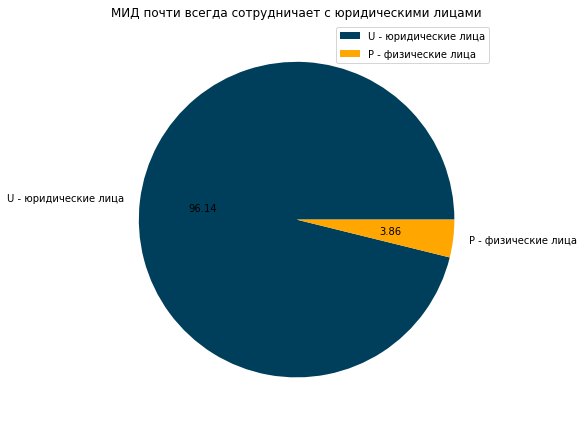

In [ ]:
graph_data = df['sup_type'].value_counts()

fig, ax = plt.subplots()
labels = {'U': 'U - юридические лица', 'P': 'P - физические лица'}
ax.pie(graph_data, labels = [labels[l] for l in graph_data.index], autopct='%.2f', colors=pie_colors)
ax.set_title('МИД почти всегда сотрудничает с юридическими лицами')
ax.legend()
fig.tight_layout()
fig;

Статистика показывает, что МИД сотрудничает преимущественно и почти исключительно с юридическими лицами, однако некоторые продукты поставляются индивидуальными предпринимателями. 

In [ ]:
save_graph(fig, 'МИД почти всегда сотрудничает с юридическими лицами')

Сохранено: graphs/МИД почти всегда сотрудничает с юридическими лицами.png


Посмотрим на поставщиков, с которыми МИД заключал больше всего контрактов. 

In [ ]:
top_supps = df.groupby('sup_inn', as_index=False).regNum.count().sort_values(by='regNum', ascending=False)[:15]
top_supps.index = range(top_supps.shape[0])
top_supps['sup_name'] = top_supps.sup_inn.apply(lambda x: df[df.sup_inn == x].iloc[0].sup_name[0])
top_supps

,sup_inn,regNum,sup_name
0,7704010978,64,"ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ГЛАВНОЕ ПРОИЗВОДСТВЕННО-КОММЕРЧЕСКОЕ УПРАВЛЕНИЕ ПО ОБСЛУЖИВАНИЮ ДИПЛОМАТИЧЕСКОГО КОРПУСА ПРИ МИНИСТЕРСТВЕ ИНОСТРАННЫХ ДЕЛ РОССИЙСКОЙ ФЕДЕРАЦИИ"""
1,7704595082,60,"ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ГЛАВНОЕ УПРАВЛЕНИЕ ПО ОБЕСПЕЧЕНИЮ ДЕЯТЕЛЬНОСТИ МИНИСТЕРСТВА ИНОСТРАННЫХ ДЕЛ РОССИЙСКОЙ ФЕДЕРАЦИИ"""
2,7813252159,50,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ГОЗНАК"""
3,7728757423,28,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПАРАМИТЕК"""
4,7730050504,27,"ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ПРЕЗИДЕНТ-СЕРВИС"" УПРАВЛЕНИЯ ДЕЛАМИ ПРЕЗИДЕНТА РОССИЙСКОЙ ФЕДЕРАЦИИ"
5,7721609433,25,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИНФОРСЕР ИНЖИНИРИНГ"""
6,7707082071,24,"ФЕДЕРАЛЬНОЕ АВТОНОМНОЕ УЧРЕЖДЕНИЕ ""ГЛАВНОЕ УПРАВЛЕНИЕ ГОСУДАРСТВЕННОЙ ЭКСПЕРТИЗЫ"""
7,7704115900,23,"ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ЦЕНТР ТЕХНИЧЕСКИХ СИСТЕМ ПЕРЕДАЧИ ИНФОРМАЦИИ ПРИ МИНИСТЕРСТВЕ ИНОСТРАННЫХ ДЕЛ РОССИЙСКОЙ ФЕДЕРАЦИИ"""
8,7710016640,22,"ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКАЯ ГОРОДСКАЯ ТЕЛЕФОННАЯ СЕТЬ"""
9,7813352058,21,"ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ГОЗНАК"""


Визуализируем собранную статистику.

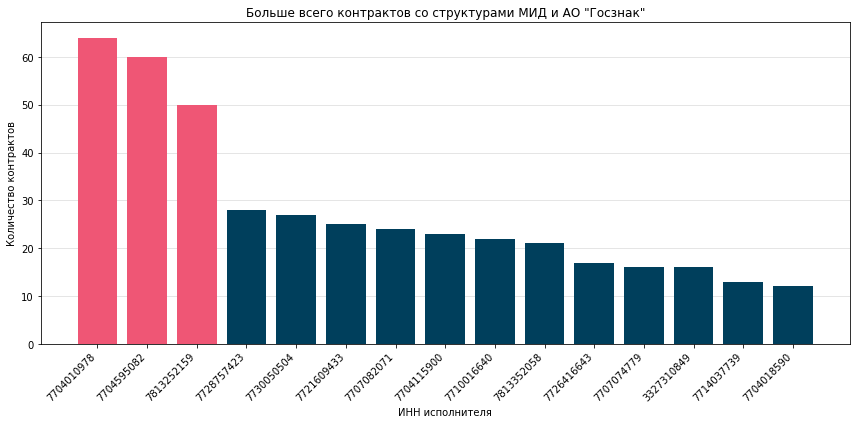

In [ ]:
fig, ax = plt.subplots()
ax.grid(axis='y', zorder=0)
ax.bar(x=top_supps.sup_inn, height=top_supps.regNum, zorder=5,
       label='Количество контрактов с исполнителем', 
       color=[accent_color] * 3 + [default_color] * 12)
ax.set_xticks(ticks=range(top_supps.shape[0]), labels=top_supps.sup_inn, 
              rotation=45, ha='right')
ax.set_xlabel('ИНН исполнителя')
ax.set_ylabel('Количество контрактов')
ax.set_title('Больше всего контрактов со структурами МИД и АО "Госзнак"')
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Больше всего контрактов со структурами МИД и АО "Госзнак"')

Сохранено: graphs/Больше всего контрактов со структурами МИД и АО "Госзнак".png


### Количество контрактов по годам

Посмотрим, как менялось количество начавших и закончивших действовать контрактов по годам. 

Извлечем из колонок с датами кода для упрощения группировки по годам. 

In [ ]:
df['signYear'] = df['signDate'].dt.year  # год подписания 
df['startYear'] = df['startDate'].dt.year  # год начала дейтсвия контракта
df['endYear'] = df['endDate'].dt.year  # год окончания действия контракта 

Визуализируем количество контрактов, которые начали действовать и закончили действовать, по годам.

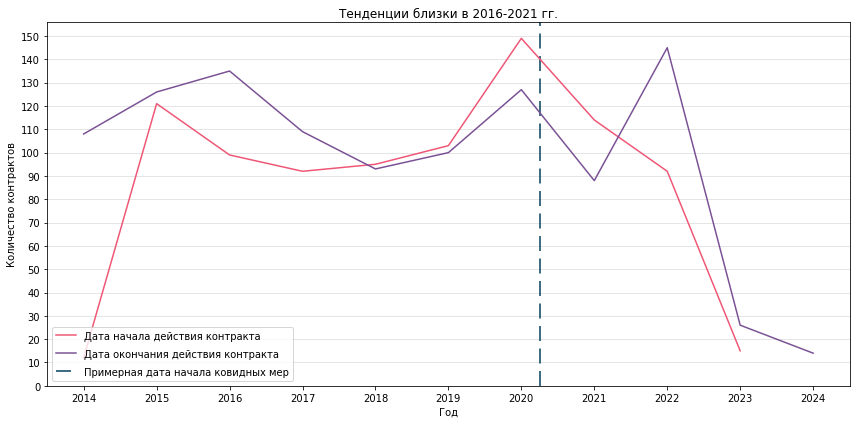

In [ ]:
graph_data1 = df.groupby('startYear')['regNum'].count()[2014:]
graph_data2 = df.groupby('endYear')['regNum'].count()[3:]

fig, ax = plt.subplots() 
ax.grid(axis='y', zorder=0)
ax.plot(graph_data1, color=accent_color, label='Дата начала действия контракта',
        zorder=5)
ax.plot(graph_data2, color=second_accent_color, 
        label='Дата окончания действия контракта', zorder=6)
ax.axvline(x=2020.25, color=default_color, linestyle=(0, (10, 5)),
           label='Примерная дата начала ковидных мер', zorder=2)
ax.set_xticks(ticks=range(2014, 2025), labels=range(2014, 2025))
ax.set_yticks(ticks=range(0, 160, 10), labels=range(0, 160, 10))
ax.set_xlabel('Год')
ax.set_ylabel('Количество контрактов')
ax.set_title('Тенденции близки в 2016-2021 гг.')
ax.legend(loc='lower left')
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Тенденции близки в 2016-2021 гг.')

Сохранено: graphs/Тенденции близки в 2016-2021 гг..png


### Деньги

Посмотрим на соотношение валют и на статистику трат МИДа в рамках контрактов. 

Посмотрим на соотношение валют, использованных для заключения договора. 

In [ ]:
df['currencyCode'].value_counts().to_frame()

,currencyCode
RUB,1553
USD,3


Визуализируем соотношение. 

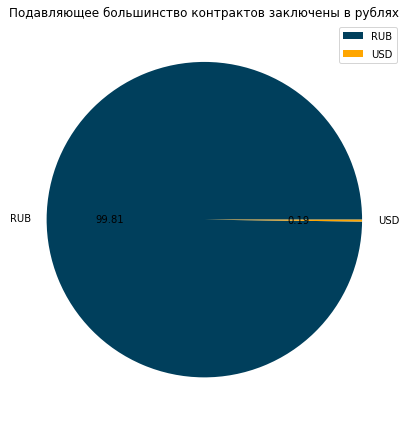

In [ ]:
graph_data = df['currencyCode'].value_counts()

fig, ax = plt.subplots()
ax.pie(graph_data, labels = graph_data.index, autopct='%.2f',
       colors=pie_colors)
ax.set_title('Подавляющее большинство контрактов заключены в рублях')
ax.legend()
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Подавляющее большинство контрактов заключены в рублях')

Сохранено: graphs/Подавляющее большинство контрактов заключены в рублях.png


Визуализируем то, как менялись заявленная в контракте стоимость, реальная стоимость одной единицы продутка и итоговая сумма, выплаченная по контракту, за весь промежуток времени. 

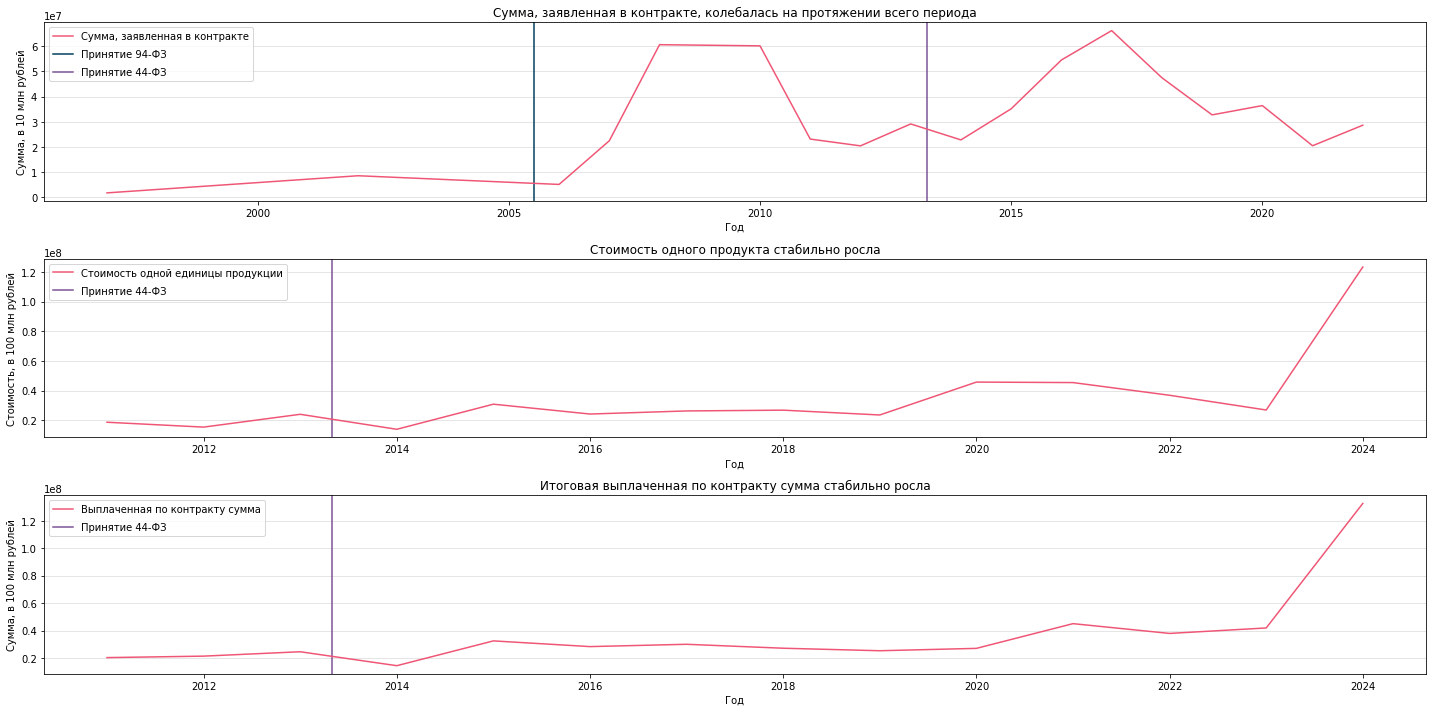

In [ ]:
graph_data1 = df.groupby('signYear')['contractPrice'].mean() 
graph_data2 = df.groupby('endYear')['prodPrice'].mean() 
graph_data3 = df.groupby('endYear')['prodSum'].mean() 

fig, ax = plt.subplots(3, 1, figsize = (20, 10))
ax[0].plot(graph_data1, label='Сумма, заявленная в контракте', 
           color=accent_color, zorder=5)
ax[0].axvline(x=2005.5, label='Принятие 94-ФЗ', color=default_color, zorder=2)
ax[0].set_ylabel('Сумма, в 10 млн рублей')
ax[0].set_title('Сумма, заявленная в контракте, колебалась на протяжении всего периода')
ax[1].plot(graph_data2, label='Стоимость одной единицы продукции', 
           color=accent_color, zorder=5)
ax[1].set_ylabel('Стоимость, в 100 млн рублей')
ax[1].set_title('Стоимость одного продукта стабильно росла')
ax[2].plot(graph_data3, label='Выплаченная по контракту сумма', 
           color=accent_color, zorder=5)
ax[2].set_ylabel('Сумма, в 100 млн рублей')
ax[2].set_title('Итоговая выплаченная по контракту сумма стабильно росла')

for a in ax.ravel():
    a.grid(axis='y', zorder=0)
    a.set_xlabel('Год')
    a.axvline(x=2013.33, label='Принятие 44-ФЗ', color=second_accent_color, zorder=2)
    a.legend(loc='upper left')

fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Изменения в ценах по годам')

Сохранено: graphs/Изменения в ценах по годам.png


Визуализируем изменение заявленной в контракте стоимости, учитывая каждый контракт, чтобы увидеть даты, когда происходили пики. 

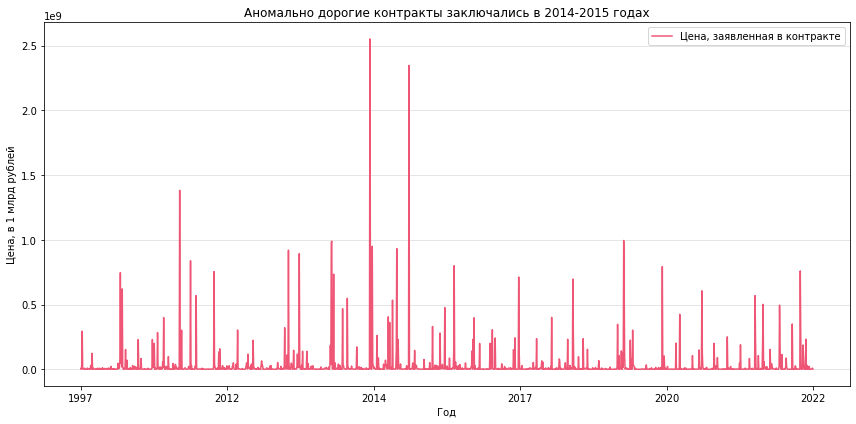

In [ ]:
graph_data = df.iloc[::-1]

fig, ax = plt.subplots()
ax.grid(axis='y', zorder=0)
ax.plot(graph_data['contractPrice'], label='Цена, заявленная в контракте',
        color=accent_color, zorder=5)
ax.set_xticks(ticks=range(0, graph_data.shape[0], 311), labels=graph_data['signYear'][::311])
ax.set_xlabel('Год')
ax.set_ylabel('Цена, в 1 млрд рублей')
ax.legend()
ax.set_title('Аномально дорогие контракты заключались в 2014-2015 годах')
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Аномально дорогие контракты заключались в 2014-2015 годах')

Сохранено: graphs/Аномально дорогие контракты заключались в 2014-2015 годах.png


Посмотрим на гистограммы распределения переменных, связанных с деньгами. 

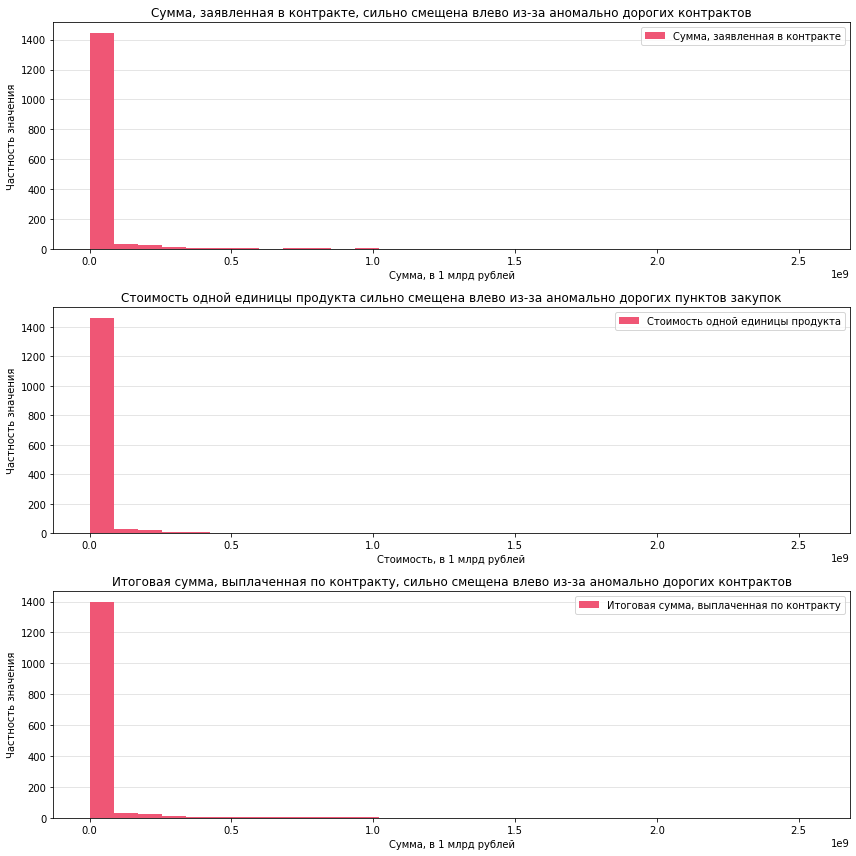

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
ax[0].hist(df['contractPrice'], label='Сумма, заявленная в контракте', 
           color=accent_color, zorder=2)
ax[0].set_title('Сумма, заявленная в контракте, сильно смещена влево из-за аномально дорогих контрактов')
ax[1].hist(df['prodPrice'], label='Стоимость одной единицы продукта',
           color=accent_color, zorder=2)
ax[1].set_title('Стоимость одной единицы продукта сильно смещена влево из-за аномально дорогих пунктов закупок')
ax[2].hist(df['prodSum'], label='Итоговая сумма, выплаченная по контракту',
           color=accent_color, zorder=2)
ax[2].set_title('Итоговая сумма, выплаченная по контракту, сильно смещена влево из-за аномально дорогих контрактов')
for a in ax.ravel():
    a.grid(axis='y', zorder=0)
    a.set_xlabel('Сумма, в 1 млрд рублей')
    a.set_ylabel('Частность значения')
    a.legend()
ax[1].set_xlabel('Стоимость, в 1 млрд рублей')
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Распределение денежных переменных сильно смещено влево')

Сохранено: graphs/Распределение денежных переменных сильно смещено влево.png


Построим ящики с усами для количественных переменных, чтобы оценить количество выбросов. 

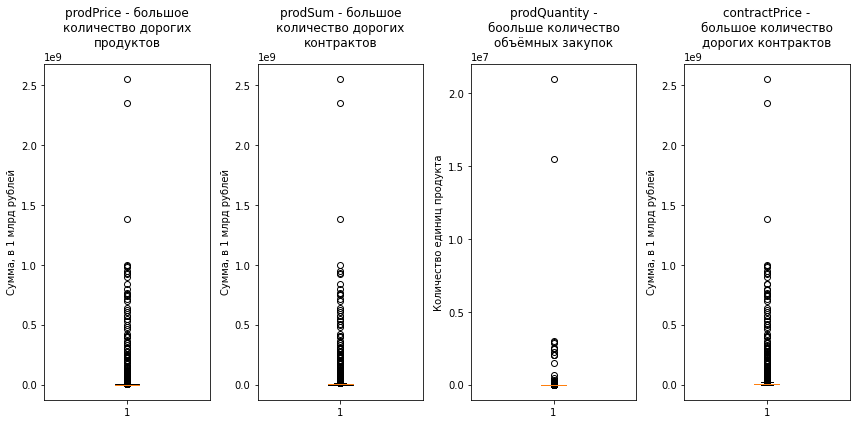

In [ ]:
fig, ax = plt.subplots(1, 4)
ax[0].boxplot(df.prodPrice)
ax[0].set_title(textwrap.fill('prodPrice - большое количество дорогих продуктов',
                              width=20))
ax[1].boxplot(df[df['prodSum'].isna() == False]['prodSum'])
ax[1].set_title(textwrap.fill('prodSum - большое количество дорогих контрактов',
                              width=20))
ax[2].boxplot(df[df['prodQuantity'].isna() == False]['prodQuantity'])
ax[2].set_title(textwrap.fill('prodQuantity - боольше количество объёмных закупок',
                              width=20))
ax[3].boxplot(df.contractPrice)
ax[3].set_title(textwrap.fill('contractPrice - большое количество дорогих контрактов', 
                              width=20))
for a in ax.ravel():
    a.set_ylabel('Сумма, в 1 млрд рублей')
ax[2].set_ylabel('Количество единиц продукта')
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Ящики с усами')

Сохранено: graphs/Ящики с усами.png


### Текущий статус контракта

Посмотрим на распределение текущего статуса контракта: сколько действует, сколько завершились, сколько были аннулированы.

In [ ]:
df['currentContractStage'].value_counts().to_frame()

,currentContractStage
EC,788
E,519
ET,249
IN,0


Визуализируем распределение. 

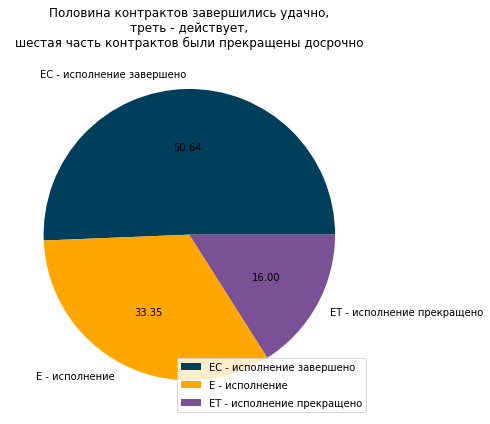

In [ ]:
graph_data = df['currentContractStage'].value_counts().drop('IN')
fig, ax = plt.subplots()
labels = {'EC': 'EC - исполнение завершено', 
          'E': 'E - исполнение', 
          'ET': 'ET - исполнение прекращено'}
ax.pie(graph_data, labels=[labels[l] for l in graph_data.index], autopct='%.2f',
       colors=pie_colors)
ax.set_title('Половина контрактов завершились удачно,\nтреть - действует,\n'\
             'шестая часть контрактов были прекращены досрочно')
ax.legend(loc='lower right')
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Текущие статусы контрактов')

Сохранено: graphs/Текущие статусы контрактов.png


### Федеральный закон

Закупки должны проводиться по 44-ФЗ, однако в датафрейме встречается и 94-ФЗ. Посмотрим на то, как выстраивается соотношение двух федеральных законов, которые являются, по сути, взаимозаменяемыми: 94-ФЗ был принят вместо 44-ФЗ.

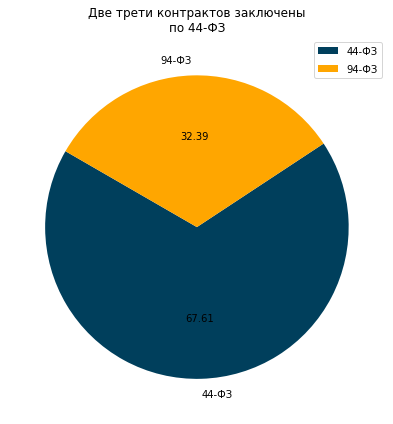

In [ ]:
graph_data = df.fz.value_counts()

fig, ax = plt.subplots()
ax.pie(graph_data, labels=[str(i) + '-ФЗ' for i in graph_data.index], startangle = 150, autopct='%.2f',
       colors=pie_colors)

ax.set_title('Две трети контрактов заключены\nпо 44-ФЗ')
ax.legend()
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Две трети контрактов заключены по 44-ФЗ')

Сохранено: graphs/Две трети контрактов заключены по 44-ФЗ.png


Посмотрим, какие законы использовались в какие года. 

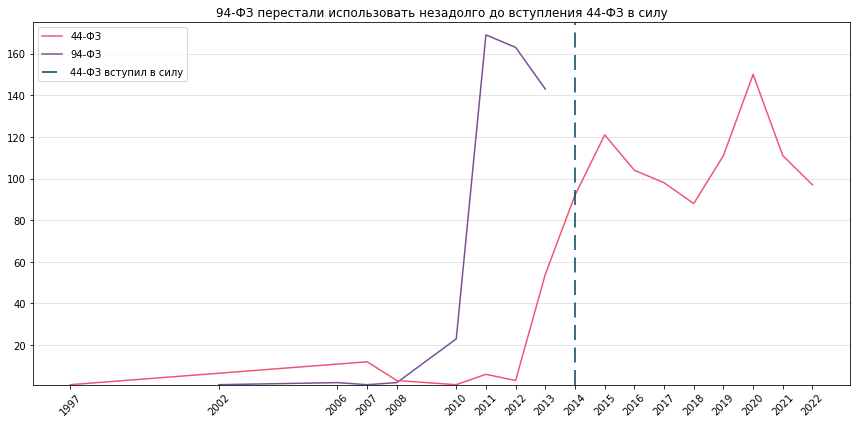

In [ ]:
graph_data1 = df[df['fz'] == 44]['signYear'].value_counts().sort_index()
graph_data2 = df[df['fz'] == 94]['signYear'].value_counts().sort_index()

fig, ax = plt.subplots()
ax.grid(axis='y', zorder=0)
ax.plot(graph_data1, color=accent_color, label='44-ФЗ', zorder=5)
ax.plot(graph_data2, color=second_accent_color, label='94-ФЗ', zorder=4)
x_ticks = sorted(set(list(graph_data1.index) + list(graph_data2.index)))
ax.set_xticks(ticks=x_ticks, labels=x_ticks, rotation=45)
ax.set_ylim(1, 175)
ax.axvline(x=2014, label='44-ФЗ вступил в силу', zorder=10, color=default_color, 
           linestyle=(0, (10, 5)))

ax.set_title('94-ФЗ перестали использовать незадолго до вступления 44-ФЗ в силу')
ax.legend()
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, '94-ФЗ перестали использовать незадолго до вступления 44-ФЗ в силу')

Сохранено: graphs/94-ФЗ перестали использовать незадолго до вступления 44-ФЗ в силу.png


### Код региона закупки

Посмотрим на распределение кодов регионов, которые указаны в контрактах. Главное здание МИД находится в Москве — 77 регион. 

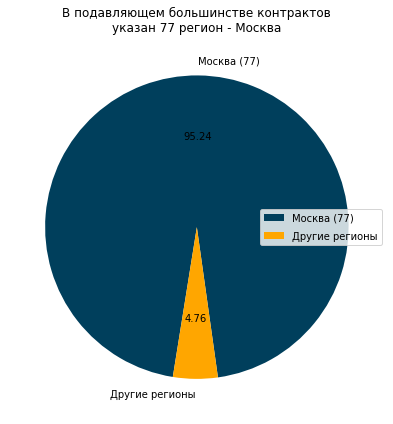

In [ ]:
graph_data = np.array([df['regionCode'].value_counts()[77], df['regionCode'].value_counts()[1:].sum()])

fig, ax = plt.subplots()
ax.pie(graph_data, labels = ['Москва (77)', 'Другие регионы'], 
       startangle = 278, autopct='%.2f', colors=pie_colors)
ax.set_title('В подавляющем большинстве контрактов\nуказан 77 регион - Москва')
ax.legend(loc='center right')
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, '94-ФЗ перестали использовать незадолго до вступления 44-ФЗ в силу')

Сохранено: graphs/94-ФЗ перестали использовать незадолго до вступления 44-ФЗ в силу.png


### ОКПД: тип закупаемой продукции

Посмотрим на самые популярные коды, всречающиеся в закупках МИДа.

Сгруппируем данные по ОКПД2 и посчитаем среднюю стоимость одного продукта по каждой кодировке. Для визуализации возьмём первые 15 кодировок. 

In [ ]:
okpd2_stat = df[df['OKPD2'].isna() == False].groupby('OKPD2')['prodPrice'].mean().to_frame().sort_values(by='prodPrice', ascending=False)[:15]

Посмотрим, что значат отобранные кодировки. 

In [ ]:
explain_okpd(okpd2_stat.index);

ОКПД2 - 41.20.30.000 Работы по возведению жилых зданий
ОКПД2 - 41.20.10.120 Здания общежитий
ОКПД2 - 51.10.13.000 Услуги по регулярным пассажирским перевозкам воздушным транспортом на международных линиях
ОКПД2 - 62.02.30.000 Услуги по технической поддержке информационных технологий
ОКПД2 - 49.39.39.000 Услуги по перевозке пассажиров сухопутным транспортом, не включенные в другие группировки
ОКПД2 - 33.13.19.000 Услуги по ремонту и техническому обслуживанию прочего профессионального электронного оборудования
ОКПД2 - 62.01.11.000 Услуги по проектированию и разработке информационных технологий для прикладных задач и тестированию программного обеспечения
ОКПД2 - 63.11.11.000 Услуги по обработке данных
ОКПД2 - 35.12.10.120 Услуги по технологическому присоединению к распределительным электросетям
ОКПД2 - 43.22.11.150 Работы по монтажу канализационных систем
ОКПД2 - 61.90.10.160 Услуги связи по предоставлению каналов связи
ОКПД2 - 86.21.10.190 Услуги, предоставляемые врачами общей врачебной 

Визуализируем собранные данные. 

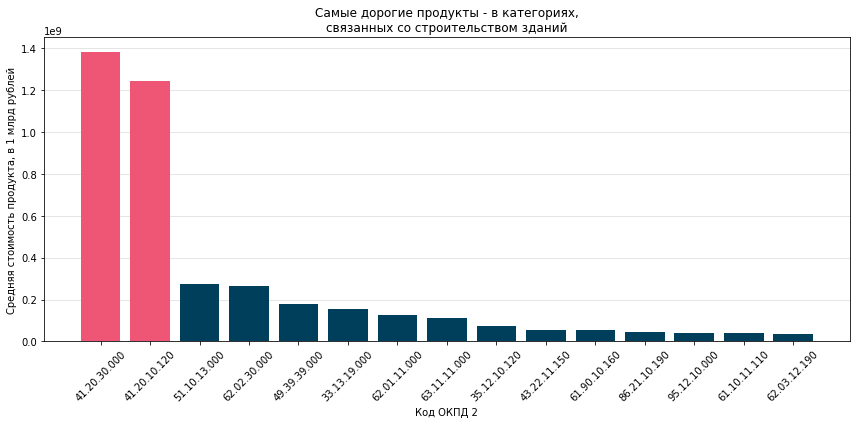

In [ ]:
fig, ax = plt.subplots()
ax.grid(axis='y', zorder=0)
ax.bar(x=okpd2_stat.index, height=okpd2_stat.prodPrice, 
       label='Средняя стоимость продукта', 
       color=[accent_color] * 2 + [default_color] * 13, zorder=5)
ax.set_xticks(ticks=range(len((okpd2_stat.index))), labels=okpd2_stat.index,
              rotation=45)
ax.set_xlabel('Код ОКПД 2')
ax.set_ylabel('Средняя стоимость продукта, в 1 млрд рублей')
ax.set_title('Самые дорогие продукты - в категориях,\nсвязанных со строительством зданий')
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Самые дорогие продукты - в категориях, связанных со строительством зданий')

Сохранено: graphs/Самые дорогие продукты - в категориях, связанных со строительством зданий.png


Аналогично с ОКПД2, сгруппируем данные по ОКПД1 и посчитаем среднюю стоимость одного продукта по каждой кодировке. Для визуализации возьмём первые 15 кодировок. 

In [ ]:
okpd_stat = df[df['OKPD'].isna() == False].groupby('OKPD')['prodPrice'].mean().to_frame().sort_values(by='prodPrice', ascending=False)[:15]

Посмотрим, что значат отобранные кодировки. 

In [ ]:
explain_okpd(okpd_stat.index);

ОКПД1 - 63.30.13.130 Услуги по предоставлению информации о средствах размещения, включая услуги по бронированию средств размещения
ОКПД1 - 74.85.11.000 Услуги, заключающиеся в ответах на телефонные звонки
ОКПД1 - 62.10.10.130 Перевозки пассажирские воздушным транспортом на международных линиях, подчиняющиеся расписанию
ОКПД1 - 60.22.12.000 Услуги по аренде легковых автомобилей с водителем
ОКПД1 - 63.30.12.145 Услуги по обеспечению проездными билетами на воздушный транспорт для внутреннего туризма
ОКПД1 - 75.11.12.413 Финансирование расходов федерального бюджета на транспортные услуги для бюджетных учреждений
ОКПД1 - 74.20.36.990 Услуги в области инженерно-технического проектирования прочие, не включенные в другие группировки
ОКПД1 - 45.21.15.160 Работы общестроительные по ремонту прочих зданий
ОКПД1 - 72.21.12.000 Производство готового программного обеспечения и предоставление прав на его использование
ОКПД1 - 72.22.13.000 Услуги по системному анализу и программированию при построении 

Визуализируем собранные данные.

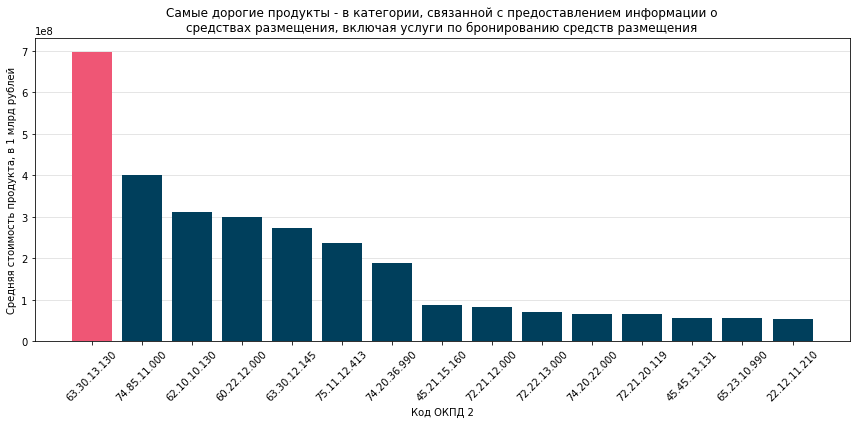

In [ ]:
fig, ax = plt.subplots()
ax.grid(axis='y', zorder=0)
ax.bar(x=okpd_stat.index, height=okpd_stat.prodPrice, 
       label='Средняя стоимость продукта', 
       color=[accent_color] + [default_color] * 14, zorder=5)
ax.set_xticks(ticks=range(len((okpd_stat.index))), labels=okpd_stat.index,
              rotation=45)
ax.set_xlabel('Код ОКПД 2')
ax.set_ylabel('Средняя стоимость продукта, в 1 млрд рублей')
ax.set_title(textwrap.fill('Самые дорогие продукты - в категории, связанной '\
                           'с предоставлением информации о средствах размещения, '\
                           'включая услуги по бронированию средств размещения', 
                           width=80))
fig.tight_layout()
fig;

# Гипотезы по событиям

Исследовательский вопрос: как события, происходящие в мире и в стране, влияют на закупки МИДа?

Для ответа на вопрос проверим гипотезы, связанные с выделенными важными событиями, которые потенциально могли повлиять на закупки МИДа. 

## Авиакомпании

**Гипотеза:** авиакатастрофы, происходящие с 2014 по 2021 года, влияли на выбор компании-перевозчика со стороны МИДа. 

**Результат:** авиакатастрофы, которые происходили с 2014 по 2021 года, никак не повлияли на закупки МИД, потому что МИД в принципе нет контрактов с этими компаниями. 

Прежде всего убедимся, что контракты с этими компаниями в принципе существуют.

In [ ]:
avia_inns = ['7703711949', '7704252261', '8608050754', '6452008711', '7712040126', '6608003013']
# [Unijet, ВКС РФ, Когалымавиа, Саратовские авиалинии, Аэрофлот, Уральские авиалинии]

df[df.sup_inn.apply(lambda x: x in avia_inns)] 

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear


Не существуют... 

## Олимпиада в Сочи (2014)

**Гипотеза:** МИД отвечает за транспортировку и организацию жизни иностранных гостей, прибывающих на мероприятия в рамках олимпиады в Сочи. 

**Результат:** явно связанных с этим контрактов у МИДа не найдено. 

Соберём кодировки из ОКПД и ОКПД2, которые (предположительно) могут быть связаны с услугами, оказанными МИДом в рамках олимпиады в Сочи. 

In [ ]:
sochi_okpd2 = ['94.99.19.150', '92.62.12.110', '51.10.1', '56.30.10.113', '55.10', '55.1', '84.13.15.000', '79.11.2', 
              '79.90.12.190', '79.90.12', '79.11.23.000', '91.03.10', '79.11.19']

for code in sochi_okpd2:
    try:
        print(code, get_okpd(code, 2))
    except:
        try:
            print(code, get_okpd(code, 1), 1)
        except:
            print(code)

94.99.19.150 Услуги объединений, создаваемых с целью проведения культурных и развлекательных мероприятий и организации досуга, кроме спорта или игр
92.62.12.110 Услуги по организации и проведению массовых спортивных мероприятий 1
51.10.1 Услуги по пассажирским перевозкам воздушным транспортом
56.30.10.113 Услуги баров в гостиницах и прочих местах для проживания
55.10 Услуги гостиниц и аналогичные услуги по предоставлению временного жилья
55.1 Услуги гостиниц и аналогичные услуги по предоставлению временного жилья
84.13.15.000 Услуги государственного управления, связанные с отраслями распределения и общественного питания, гостиницами и ресторанами
79.11.2 Услуги туристических агентств по бронированию мест временного проживания, круизов и туристических поездок с полным обслуживанием
79.90.12.190 Услуги туристические информационные прочие
79.90.12 Услуги туристические информационные
79.11.23.000 Услуги по бронированию туристических поездок с полным обслуживанием
91.03.10 Услуги, связанные

Выставляем даты, в период которых происходила подготовка к олимпиаде и само мероприятие. 

In [ ]:
sochi_startdate = datetime.datetime.strptime('2007-07-05', '%Y-%m-%d')  # дата начала подготовки
sochi_enddate = datetime.datetime.strptime('2014-03-01', '%Y-%m-%d')  # максимальная дата завершения всех мероприятий

Смотрим те строки датафрейма, которые включены в указанные ранее даты и контракты в которых имеют статус "завершены", так как олимпиада уже прошла, и нам не актуальны контракты, которые были заключены в то время и продолжаются до сих пор. 

In [ ]:
df[(df.signDate >= sochi_startdate) & (df.endDate <= sochi_enddate) & (df.currentContractStage == 'EC')]

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
980,106100003614000000,EC,2013-12-27,NaT,2013-12-01,10,44,RUB,999710.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""К-МОТОРС""]",1001179610,U,None,34.10.22.311,999710.00,1.00,999710.00,2013,NaN,2013
1008,173100002213000192,EC,2013-12-11,NaT,2014-03-01,77,44,RUB,15120.00,"[ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ ""НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ ""ВЫСШАЯ ШКОЛА ЭКОНОМИКИ""]",7714030726,U,None,85.32.15.120,15120.00,1.00,15120.00,2013,NaN,2014
1020,173100002213000160,EC,2013-11-27,NaT,2014-02-01,77,44,RUB,7799900.32,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПАРАМИТЕК""]",7728757423,U,None,30.02.16.194,72662.04,1.00,72662.04,2013,NaN,2014
1021,173100002213000160,EC,2013-11-27,NaT,2014-03-01,77,44,RUB,1271403.55,"[ООО ""ИЗДАТЕЛЬСТВО ИНИКО""]",6904040449,U,None,32.10.62.116,350.00,100.00,35000.00,2013,NaN,2014
1029,173100002213000160,EC,2013-11-07,NaT,2014-02-01,77,44,RUB,50000000.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЙПИ ВИДЕО СИСТЕМС""]",7714606600,U,None,29.24.91.000,1069264.00,1.00,1069264.00,2013,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,173100002212000160,EC,2010-09-30,NaT,2012-12-01,77,94,RUB,100000.00,"[""СБЕРБАНК РОССИИ"" (ФИЛИАЛ-МОСКОВСКИЙ БАНК СБЕРБАНКА РОССИИ ОАО)]",7707083893,U,None,None,100000.00,1.00,100000.00,2010,NaN,2012
1524,173100002212000160,EC,2010-09-30,NaT,2012-12-01,77,94,RUB,100000.00,"[""СБЕРБАНК РОССИИ"" (ФИЛИАЛ-МОСКОВСКИЙ БАНК СБЕРБАНКА РОССИИ ОАО)]",7707083893,U,None,None,100000.00,1.00,100000.00,2010,NaN,2012
1525,173100002212000160,EC,2010-09-30,NaT,2012-12-01,77,94,RUB,100000.00,"[""СБЕРБАНК РОССИИ"" (ФИЛИАЛ-МОСКОВСКИЙ БАНК СБЕРБАНКА РОССИИ ОАО)]",7707083893,U,None,None,100000.00,1.00,100000.00,2010,NaN,2012
1527,152100007411000000,EC,2010-09-08,NaT,2011-07-01,55,94,RUB,937860.00,[ОМСКИЙ ОБЛАСТНОЙ СОЮЗ ПОТРЕБИТЕЛЬСКИХ ОБЩЕСТВ],5503011858,U,None,None,937860.00,1.00,937860.00,2010,NaN,2011


Выводим ОКПД, указанные в контрактах, отфильтрованных выше. 

In [ ]:
for code in df[(df.signDate >= sochi_startdate) & (df.endDate <= sochi_enddate) & (df.currentContractStage == 'EC')].OKPD.dropna().to_list():
    print(code, get_okpd(code, 1))

34.10.22.311 Автомобили легковые с двигателем с искровым зажиганием, с рабочим объемом цилиндров более 1500 см[3*], но не более 1800 см[3*], прочие, новые
85.32.15.120 Услуги социальные, связанные с профессиональной подготовкой, обучением, переобучением и консультациями по трудоустройству, предоставляемые иными учреждениями и предприятиями социального обслуживания, благотворительными организациями и гражданами, занимающимися предпринимательской деятельностью по социальному обслуживанию населения без образования юридического лица
30.02.16.194 Устройства периферийные многофункциональные (объединенные принтер, фотокопир, сканер, факс и прочие устройства)
32.10.62.116 Схемы интегральные МОП-структурные цифровые монолитные: электрически стираемые перепрограммируемые постоянные запоминающие устройства (ЭСППЗУ), в том числе флэш-память (флэш-ППЗУ)
29.24.91.000 Услуги по монтажу прочего оборудования общего назначения, не включенного в другие группировки
74.11.15.310 Консультации юридические пр

Обнаруживаем, что, вероятнее всего, эти контракты никак не связаны с проведением олимпиады. 

## Празднование 70-летия победы в Великой Отечественной войне (2015)

**Гипотеза:** МИД мог заключать контракты на перевозку и размещение иностранных гостей, приехавших в Москву на празднование, а также мог способствовать организации проведения праздичных мероприятий за пределами РФ. 

**Результат:** гипотеза частично подтвердилась, так как МИД и правда мог выступать соорганизатором мероприятий, посвящённых 70-летию победы за границей РФ. 

Определяем коды ОКПД и ОКПД2, которые могут быть связаны с деятельностью МИД в рамках празднования Дня Победы. 

In [ ]:
victory_okpd = ['94.99.19.150', '92.62.12.110', '51.10.1', '56.30.10.113', 
                '55.10', '55.1', '84.13.15.000', '79.11.2', '79.90.12.190', 
                '79.90.12', '79.11.23.000', '91.03.10', '79.11.19']

for code in victory_okpd:
    try: print(code, get_okpd(code, 2))
    except:
        try: print(code, get_okpd(code, 1), 1)
        except: print(code)

94.99.19.150 Услуги объединений, создаваемых с целью проведения культурных и развлекательных мероприятий и организации досуга, кроме спорта или игр
92.62.12.110 Услуги по организации и проведению массовых спортивных мероприятий 1
51.10.1 Услуги по пассажирским перевозкам воздушным транспортом
56.30.10.113 Услуги баров в гостиницах и прочих местах для проживания
55.10 Услуги гостиниц и аналогичные услуги по предоставлению временного жилья
55.1 Услуги гостиниц и аналогичные услуги по предоставлению временного жилья
84.13.15.000 Услуги государственного управления, связанные с отраслями распределения и общественного питания, гостиницами и ресторанами
79.11.2 Услуги туристических агентств по бронированию мест временного проживания, круизов и туристических поездок с полным обслуживанием
79.90.12.190 Услуги туристические информационные прочие
79.90.12 Услуги туристические информационные
79.11.23.000 Услуги по бронированию туристических поездок с полным обслуживанием
91.03.10 Услуги, связанные

Проверяем, есть ли обозначенные выше кодировки среди записей в наборе данных.

In [ ]:
df[(df.OKPD2.apply(lambda x: x in victory_okpd)) | (df.OKPD.apply(lambda x: x in victory_okpd))]

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear


Их нет... 

Определяем даты, в которые происходила подготовка к празднованию и само празднование. Отправной точкой служит дата, когда Президент РФ подписал указ "О подготовке и проведении празднования 70-ой годовщины победы в Великой Отечественной Войне". 

In [ ]:
victory_startdate = datetime.datetime.strptime('2013-04-25', '%Y-%m-%d')  # дата начала подготовки
victory_enddate = datetime.datetime.strptime('2015-05-10', '%Y-%m-%d')  # дата окончания празднований 

Как и в случае с олимпиадой в Сочи, проведём фильтрацию по датам и выберем те, в которые началась подготовка к празднованию победы и в которые она завершилась (следующий день после официального дня празднования). 

In [ ]:
victory_df = df[(df.signDate >= victory_startdate) & 
                (df.endDate <= victory_enddate) & 
                (df.currentContractStage == 'EC')]
victory_df

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
870,1770420620115000064,EC,2015-03-02,2015-03-02,2015-04-30,77,44,RUB,22400000.00,"[ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ПРЕЗИДЕНТ-СЕРВИС"" УПРАВЛЕНИЯ ДЕЛАМИ ПРЕЗИДЕНТА РОССИЙСКОЙ ФЕДЕРАЦИИ]",7730050504,U,None,62.10.10.130,22400000.00,1.00,22400000.00,2015,2015.00,2015
879,1770420620115000064,EC,2015-01-12,2015-01-12,2015-03-31,77,44,RUB,888861.60,"[ЗАКРЫТОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ТЕЛЕКС""]",3301012982,U,None,32.20.20.290,1033.56,860.00,888861.60,2015,2015.00,2015
883,173100002214000096,EC,2014-12-25,2014-12-25,2015-03-01,77,44,RUB,890189.97,"[ЗАО ""ИНФОРМТЕХНИКА И ПРОМСВЯЗЬ""]",7720251459,U,None,32.10.52.990,76528.90,1.00,76528.90,2014,2014.00,2015
884,173100002214000096,EC,2014-12-25,NaT,2015-03-01,77,44,RUB,2609047.18,"[ЗАО ""ЛАУД-ЛИНК""]",7723018669,U,None,32.20.20.640,7673.66,62.00,475766.92,2014,NaN,2015
886,173100002214000096,EC,2014-12-10,NaT,2015-01-01,77,44,RUB,5940000.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТЕХНОКОНСАЛТ""]",7731444780,U,None,30.01.24.190,3550.00,811.00,2879050.00,2014,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,173100002213000096,EC,2013-07-03,NaT,2013-10-01,77,94,RUB,4000000.00,"[ЗАКРЫТОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ХИМКОМПЛЕКТЗАЩИТА""]",7720741767,U,None,None,577.72,2000.00,1155440.00,2013,NaN,2013
1082,173100002213000096,EC,2013-07-02,NaT,2013-09-01,77,94,RUB,448400.00,"[""ТОРГОВЫЙ ДОМ ЛФЗ""]",7730518581,U,None,None,2802.50,160.00,448400.00,2013,NaN,2013
1084,173100002213000096,EC,2013-07-01,NaT,2013-10-01,77,94,RUB,263200.00,"[""КОМПАНИЯ ТАРРА""]",7728727482,U,None,None,263200.00,1.00,263200.00,2013,NaN,2013
1091,173100002213000096,EC,2013-06-19,NaT,2013-08-01,77,94,RUB,2984104.50,"[ООО ""КВАТТРО""]",7728837855,U,None,None,99470.15,30.00,2984104.50,2013,NaN,2013


По отфильтрованным по датам контрактам посмотрим их ОКПД для определения  возможной причастности МИД к организации праздничных мероприятий. 

In [ ]:
for code in victory_df.OKPD.dropna().unique():
    print(code, get_okpd(code, 1))

62.10.10.130 Перевозки пассажирские воздушным транспортом на международных линиях, подчиняющиеся расписанию
32.20.20.290 Оборудование коммутации систем подвижной радиотелефонной связи
32.10.52.990 Компоненты электронные прочие, не включенные в другие группировки
32.20.20.640 Станции базовые и ретрансляторы систем подвижной радиотелефонной связи
30.01.24.190 Части и принадлежности прочих офисных машин, не включенных в другие группировки
22.22.11.140 Бланки документов с воспроизведением Государственного герба Российской Федерации
92.51.12.175 Услуги по проведению анализа, экспертизы и оценки физического и технического состояния документов
51.84.10.000 Услуги по оптовой торговле компьютерами, периферийными устройствами и программным обеспечением
19.20.14.119 Изделия из натуральной или композиционной кожи, используемые в машинах или механических устройствах, или для прочих технических целей прочие
72.60.10.000 Услуги, связанные с использованием вычислительной техники и информационных техно

Проанализировав все выданные нам ОКПД, мы выделили 85.32.15.120 

> Услуги социальные, связанные с профессиональной подготовкой, обучением, переобучением и консультациями по трудоустройству, предоставляемые иными учреждениями и предприятиями социального обслуживания, благотворительными организациями и гражданами, занимающимися предпринимательской деятельностью по социальному обслуживанию населения без образования юридического лица

Проверим, к чему данный ОКПД относится в наши даты. 

In [ ]:
victory_df[victory_df.OKPD == '85.32.15.120']

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
969,173100002214000000,EC,2014-01-15,NaT,2014-08-01,77,44,RUB,960000.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦЕНТР МЕЖДУНАРОДНЫХ СВЯЗЕЙ""]",7203205528,U,None,85.32.15.120,960000.00,1.00,960000.00,2014,NaN,2014
1008,173100002213000192,EC,2013-12-11,NaT,2014-03-01,77,44,RUB,15120.00,"[ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ ""НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ ""ВЫСШАЯ ШКОЛА ЭКОНОМИКИ""]",7714030726,U,None,85.32.15.120,15120.00,1.00,15120.00,2013,NaN,2014


По данному ОКПД было найдено две строки: 

1. Подходящий нам контракт по оказанию услуг по организации и проведению заседания Всемирного координационного совета российских соотечественников, проживающих за рубежом (представлен ниже).

2. Не подходящий контракт с НИУ ВШЭ по повышению квалификации сотрудника МИДа ([ссылка на контракт](https://zakupki.gov.ru/epz/contract/printForm/view.html?contractInfoPfId=40215992))

In [ ]:
urls_df.iloc[969]

regNum                                                                                         173100002214000000
contractUrl     http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=0173100002214000008
printFormUrl                                   http://zakupki.gov.ru/pgz/printForm?type=CONTRACT_INFO&id=13959549
Name: 969, dtype: object

[Ссылка на результаты возможного заседания](https://vksrs.com/upload/iblock/ef7/ef75fb438b4308cea919ecebd1ca3521.pdf). Показавшийся нам релевантным результат заседания: 

> 9. Рекомендовать организациям соотечественников приступить к
подготовке празднования 70-й годовщины Победы в Великой Отечественной
войне в 2015 г. В рамках юбилейных мероприятий ВКС призывает провести с
9 мая 2014 г. по 9 мая 2015 г. всемирную Вахту Памяти. Привлечь
молодежное крыло соотечественных организаций к акции «Великая
Отечественная война глазами внуков и правнуков в 21 веке». Довести до
сведения КСОРСов и общин соотечественников Рекомендации ВКС по
проведению данных мероприятий.

## Иннополис

**Гипотеза:** после отрытия Иннополиса МИД мог начать пользоваться услугами компаний-резидентов особой экономической зоны. 

**Результат:** гипотеза не подтвердилась, так как нет ни одного контракта с компаниями-резидентами. 

Откроем датасет с данными компаний-резидентом Иннополис. 

In [ ]:
INNOPOLIS_URL = 'https://raw.githubusercontent.com/loginchik/uvxjznnzetcm/main/data/innopolis_companies.csv'

innopolis_companies = pd.read_csv(INNOPOLIS_URL)
innopolis_companies.drop(columns=['Unnamed: 0'], inplace=True)
innopolis_companies.inn = innopolis_companies.inn.astype('str')
innopolis_companies

,name,site,inn
0,МойОфис (ООО «Новые облачные технологии»),http://myoffice.ru/,7703807270
1,ООО «Открытая мобильная платформа»,http://omp.ru/,1615012605
2,ООО «ДжиДиСи Сервисез»,http://icl-services.com/,1660146230
3,ООО «АйСиЭл Техно»,http://icl-techno.ru/,1624014670
4,ООО «АйСиЭл Софт»,http://www.icl.ru/,1624016042
5,ООО «Рэдмэдробот Инновации»,http://redmadrobot.ru/,1615013662
6,ООО «К-Проекты»,http://k-projects.ru/,1615013359
7,ООО «Когнитив-платформа»,http://www.cognitive.ru/,7728742674
8,ООО «Зарница-Инновации»,http://www.zarnitza.ru,1655093079
9,ООО «ИнфоВотч-Волга»,http://www.infowatch.ru/,1615012838


Пройдёмся по ИНН компаний-резидентов Иннополиса и попробуем найти их среди исполнителей контрактов. 

In [ ]:
innopol_inns = innopolis_companies.inn.to_list()
df[df.sup_inn.apply(lambda x: x in innopol_inns)]

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear


Контракты не нашлись... 

## Миграционный кризис (2015)

**Гипотеза:** в связи с миграционным кризисом МИД начал выдавать больше документов иммигрантам. 

**Результат:** гипотеза не подтвердилась, так как не было найдено контрактов, связанных с производством паспортов в 2015 году. 

Определим ОКПД.

In [ ]:
passport_okpd2 = ['18.12.19.190', '18.12.11.000', '17.23.13.143', '17.23.13.141']

for code in passport_okpd2:
    print(code, get_okpd(code, 2))

18.12.19.190 Услуги печатные прочие, не включенные в другие группировки
18.12.11.000 Услуги по печатанию марок почтовых, марок гербовых, документов правоустанавливающих, карточек микропроцессорных, книжек чековых и прочих ценных бумаг и аналогичной продукции
17.23.13.143 Бланки форм учетной и отчетной документации
17.23.13.141 Бланки личных документов строгого учета


Отфильтруем контракты по выбранным ОКПД. 

In [ ]:
passport_df = df[df.OKPD2.apply(lambda x: x in passport_okpd2)]
passport_df.shape[0]

58

In [ ]:
passport_df.tail()

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
701,1770420620116000000,EC,2016-06-16,2016-06-16,2016-12-31,77,44,RUB,3663900.00,"[АКЦИОНЕРНОЕ ОБЩЕСТВО ""ГОЗНАК""]",7813252159,U,17.23.13.141,None,122.13,25000.00,3053250.00,2016,2016.00,2016
709,1770420620116000000,EC,2016-06-03,2016-06-03,2016-12-31,77,44,RUB,146301118.82,"[АКЦИОНЕРНОЕ ОБЩЕСТВО ""ГОЗНАК""]",7813252159,U,17.23.13.141,None,1535.18,95299.00,146301118.82,2016,2016.00,2016
711,1770420620116000000,EC,2016-05-23,2016-05-23,2016-12-31,77,44,RUB,12213000.00,"[АКЦИОНЕРНОЕ ОБЩЕСТВО ""ГОЗНАК""]",7813252159,U,18.12.11.000,None,122.13,100000.00,12213000.00,2016,2016.00,2016
755,1770420620116000000,EC,2016-01-25,2016-01-25,2016-12-31,77,44,RUB,30680000.00,"[АКЦИОНЕРНОЕ ОБЩЕСТВО ""ГОЗНАК""]",7813252159,U,18.12.11.000,None,15.34,2000000.00,30680000.00,2016,2016.00,2016
758,1770420620116000000,EC,2016-01-14,2016-01-14,2016-12-31,77,44,RUB,25698145.02,"[АКЦИОНЕРНОЕ ОБЩЕСТВО ""ГОЗНАК""]",7813252159,U,17.23.13.141,None,130.98,196199.00,25698145.02,2016,2016.00,2016


Контрактов за 2015 год нет... 

## Безопасность для дипломатов

**Гипотеза:** в связи с нападениями на посольства в 2016 году МИД мог усилить безопасность своих сотрудников. 

**Результат:** гипотеза подтвердилась, так как в 2016 году МИД и правда закупил 200 бронежилетов, вероятнее всего — для своих дипломатов ([ссылка на источник](https://life.ru/p/885550)).  

Определим ОКПД. 

In [ ]:
safety_okpd = ['14.12.30.180', '80.1', '80.10', '80.10.12.000', '80.10.1']

for code in safety_okpd:
    print(code, get_okpd(code, 2))

14.12.30.180 Бронежилеты и бронеодежда
80.1 Услуги частных охранных служб
80.10 Услуги частных охранных служб
80.10.12.000 Услуги охраны
80.10.1 Услуги частных охранных служб


Найдём контракты, относящиеся к данным ОКПД. 

In [ ]:
df[df.OKPD2.apply(lambda x: x in safety_okpd)]

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
665,1770420620116000000,EC,2016-11-15,2016-11-15,2016-12-31,77,44,RUB,3023301.97,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ДЖОРДАНО БАЛЛИСТИК""]",7707353388,U,14.12.30.180,None,15116.00,199.00,3008084.00,2016,2016.00,2016


Найдём один-единственный контакт, датированный 2016 годом, и изучим его. 

In [ ]:
urls_df.iloc[665]

regNum                                                                                        1770420620116000000
contractUrl     http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=1770420620116000096
printFormUrl                    http://zakupki.gov.ru/epz/contract/printForm/viewXml.html?contractInfoId=31411876
Name: 665, dtype: object

В рамках контракта у компании "Джордано Баллистик" было куплено 200 бронежилетов. 

## Законы Яровой (2016)

**Гипотеза:** с принятием "пакета Яровой" контракты по предоставлению услуг связи для МИДа могли подорожать. 

**Результат:** гипотеза не подтвердилась, так как тенденции к увеличению цены контрактов не было обнаружено. Результаты могут быть не совсем релевантны, так как изначально предоставленные данные могли быть неполными. 

Определим ОКПД.

In [ ]:
communicat_okpd = ['61.90.10.160', '61.10', '61.20', '63.11.1', '63.11.19.000', 
                   '63.11.12', '72.30.2', '72.30', '61.10.11.110', '61.10.11.190', 
                   '61.20.11.000', '61.10.11.120', '75.11.12.412', '64.20.13.139', 
                   '64.20.13.134', '64.20.28.110', '64.20.15.129']

for code in communicat_okpd:
    try: print(code, get_okpd(code, 2))
    except: 
        try: print(1, code, get_okpd(code, 1))
        except: print(code)

61.90.10.160 Услуги связи по предоставлению каналов связи
61.10 Услуги телекоммуникационные проводные
61.20 Услуги телекоммуникационные беспроводные
63.11.1 Услуги по обработке данных, размещению, услуги по предоставлению приложений и прочей инфраструктуры информационных технологий, услуги, связанные с созданием и использованием баз данных и информационных ресурсов
63.11.19.000 Услуги прочие по размещению и предоставлению инфраструктуры информационных технологий
63.11.12 Услуги по размещению в информационно-коммуникационной сети Интернет
1 72.30.2 Услуги по машинной обработке данных
1 72.30 Услуги по обработке данных
61.10.11.110 Услуги по предоставлению внутризоновых, междугородных и международных телефонных соединений
61.10.11.190 Услуги фиксированной телефонной связи - предоставление доступа и телефонные соединения, прочие
61.20.11.000 Услуги подвижной связи общего пользования - обеспечение доступа и поддержка пользователя
61.10.11.120 Услуги по предоставлению местных соединений
1 7

Отфильтруем контракты по указанным выше ОКПД.

In [ ]:
df[(df.OKPD2.apply(lambda x: x in communicat_okpd)) | (df.OKPD.apply(lambda x: x in communicat_okpd))]

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
14,1770420620122000128,E,2022-12-06,2023-01-01,2024-03-31,77,44,RUB,8899974.00,"[ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""РОСТЕЛЕКОМ""]",7707049388,U,61.10.11.110,None,8899974.00,1.00,8899974.00,2022,2023.00,2024
17,1770420620122000128,E,2022-11-10,2023-01-01,2024-03-03,77,44,RUB,4476467.28,"[ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКАЯ ГОРОДСКАЯ ТЕЛЕФОННАЯ СЕТЬ""]",7710016640,U,61.10.11.120,None,4476467.28,1.00,4476467.28,2022,2023.00,2024
18,1770420620122000128,E,2022-11-10,2023-01-01,2024-03-31,77,44,RUB,38567.52,"[ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКАЯ ГОРОДСКАЯ ТЕЛЕФОННАЯ СЕТЬ""]",7710016640,U,61.10.11.120,None,38567.52,1.00,38567.52,2022,2023.00,2024
19,1770420620122000128,E,2022-11-08,2023-01-01,2023-12-31,77,44,RUB,217671.84,"[ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКАЯ ГОРОДСКАЯ ТЕЛЕФОННАЯ СЕТЬ""]",7710016640,U,61.10.11.120,None,217671.84,1.00,217671.84,2022,2023.00,2023
21,1770420620122000128,E,2022-11-07,2023-01-01,2024-03-31,77,44,RUB,29618784.00,"[ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКАЯ ГОРОДСКАЯ ТЕЛЕФОННАЯ СЕТЬ""]",7710016640,U,61.10.11.120,None,29618784.00,1.00,29618784.00,2022,2023.00,2024
96,1770420620122000128,E,2022-02-01,2022-01-01,2024-03-31,77,44,RUB,1082730.00,"[ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""МЕГАФОН""]",7812014560,U,61.20.11.000,None,1082730.00,NaN,NaN,2022,2022.00,2024
109,1770420620121000192,E,2021-12-15,2022-01-01,2023-03-31,77,44,RUB,4476467.28,"[ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКАЯ ГОРОДСКАЯ ТЕЛЕФОННАЯ СЕТЬ""]",7710016640,U,61.10.11.120,None,4476467.28,1.00,4476467.28,2021,2022.00,2023
110,1770420620121000192,E,2021-12-15,2022-01-01,2023-03-31,77,44,RUB,29618784.00,"[ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКАЯ ГОРОДСКАЯ ТЕЛЕФОННАЯ СЕТЬ""]",7710016640,U,61.10.11.120,None,29618784.00,1.00,29618784.00,2021,2022.00,2023
111,1770420620121000192,E,2021-12-15,2022-01-01,2023-03-31,77,44,RUB,38567.52,"[ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""МОСКОВСКАЯ ГОРОДСКАЯ ТЕЛЕФОННАЯ СЕТЬ""]",7710016640,U,61.10.11.120,None,3213.96,12.00,38567.52,2021,2022.00,2023
120,1770420620121000192,E,2021-12-06,2022-01-01,2023-03-31,77,44,RUB,9398856.00,"[ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""РОСТЕЛЕКОМ""]",7707049388,U,61.10.11.190,None,9398856.00,1.00,9398856.00,2021,2022.00,2023


Для оценки полученных результов построим график хронологического изменения сумм контрактов по годам. 

<Axes: xlabel='signYear'>

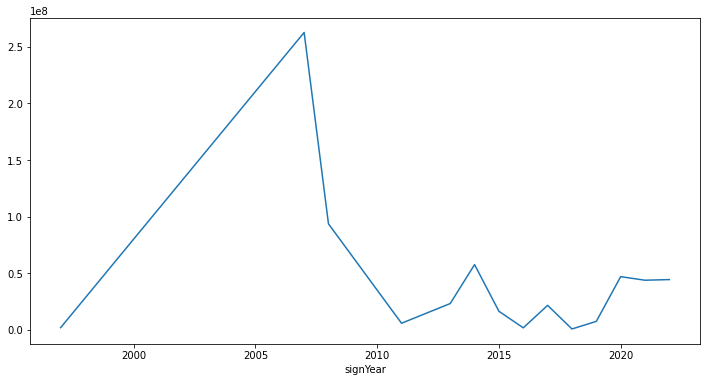

In [ ]:
df[(df.OKPD2.apply(lambda x: x in communicat_okpd)) | (df.OKPD.apply(lambda x: x in communicat_okpd))].groupby('signYear')['contractPrice'].sum().plot()

Обнаружим, что резкие изменения в суммах контрактов за год происходили до принятия "пакета Яровой" — в 2007 году. 

## Избрание президентов (Трамп — 2016, Зеленский — 2019, Токаев — 2019, Байден — 2021)

**Гипотеза:** избрание президентов влияют на закупки МИДа в сфере прессы и коммуникаций. 

**Результаты:** гипотеза не подтвердилась, так как, даже несмотря на даты подписания контрактов, все они не имеют отношения к результатам выборов президентов в других странах. 

Определим ОКПД.

In [ ]:
presidents_okpd = ['70.21.1', '73.20.20.000', '53.20.11.110']

for code in presidents_okpd:
    print(code, get_okpd(code, 2))

70.21.1 Услуги по связи с общественностью и информации
73.20.20.000 Услуги по изучению общественного мнения
53.20.11.110 Услуги специальной почтовой связи


Отфильтруем контракты по ОКПД. 

In [ ]:
df[df.OKPD2.apply(lambda x: x in presidents_okpd)]

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
1,1770420620122000128,E,2022-12-28,2023-01-01,2024-05-01,77,44,RUB,71295.00,"[ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ГЛАВНЫЙ ЦЕНТР СПЕЦИАЛЬНОЙ СВЯЗИ""]",7717043113,U,53.20.11.110,None,71295.00,1.00,71295.00,2022,2023.00,2024
103,1770420620121000192,E,2021-12-24,2022-01-01,2023-03-31,77,44,RUB,66999.00,"[ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ГЛАВНЫЙ ЦЕНТР СПЕЦИАЛЬНОЙ СВЯЗИ""]",7717043113,U,53.20.11.110,None,66999.00,1.00,66999.00,2021,2022.00,2023
217,1770420620120000256,ET,2020-12-17,2021-01-01,2022-03-31,77,44,RUB,65055.00,"[ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ГЛАВНЫЙ ЦЕНТР СПЕЦИАЛЬНОЙ СВЯЗИ"", ФИЛИАЛ ФЕДЕРАЛЬНОГО ГОСУДАРСТВЕННОГО УНИТАРНОГО ПРЕДПРИЯТИЯ ""ГЛАВНЫЙ ЦЕНТР СПЕЦИАЛЬНОЙ СВЯЗИ""-УПРАВЛЕНИЕ СПЕЦИАЛЬНОЙ СВЯЗИ ПО Г.МОСКВЕ И МОСКОВСКОЙ ОБЛАСТИ]",7717043113,U,53.20.11.110,None,65055.00,1.00,65055.00,2020,2021.00,2022
360,1770420620119000064,ET,2019-12-26,2019-12-26,2020-12-31,77,44,RUB,59241.00,"[ФИЛИАЛ ФЕДЕРАЛЬНОГО ГОСУДАРСТВЕННОГО УНИТАРНОГО ПРЕДПРИЯТИЯ ""ГЛАВНЫЙ ЦЕНТР СПЕЦИАЛЬНОЙ СВЯЗИ"", ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ГЛАВНЫЙ ЦЕНТР СПЕЦИАЛЬНОЙ СВЯЗИ""]",7717043113,U,53.20.11.110,None,59241.00,1.00,59241.00,2019,2019.00,2020


Несмотря на то что есть контракты, которые были подписаны в интересующие нас года ([2019](https://zakupki.gov.ru/epz/contract/printForm/viewXml.html?contractInfoId=54362796), [2021](https://zakupki.gov.ru/epz/contract/printForm/view.html?contractInfoId=70760927)), все они реализуются значительно позже, поэтому не являются релевантными. 

## Скандал с русскими хакерами

**Гипотеза:** на фоне скандала с русскими хакерами МИД мог усилить средства информационной защиты. 

**Результаты:** гипотеза не подтвердилась, однако мы нашли данные за 2021-2022 года, которые могут указывать на усиление информационной безопасности в структурах МИД. 

Определим ОКПД. 

In [ ]:
get_okpd('26.20.40.140', 2)

'Средства защиты информации, а также информационные и телекоммуникационные системы, защищенные с использованием средств защиты информации'

Отфильтруем записи по ОКПД.

In [ ]:
df[df.OKPD2 == '26.20.40.140']

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
11,1770420620122000128,EC,2022-12-12,2022-12-12,2022-12-31,77,44,RUB,556133.25,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СПЕЦИАЛЬНЫЕ КРИПТОГРАФИЧЕСКИЕ СИСТЕМЫ""]",6732205568,U,26.20.40.140,None,22245.33,25.00,556133.25,2022,2022.00,2022
12,1770420620122000128,EC,2022-12-12,2022-12-12,2022-12-31,77,44,RUB,384746.67,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СПЕЦИАЛЬНЫЕ КРИПТОГРАФИЧЕСКИЕ СИСТЕМЫ""]",6732205568,U,26.20.40.140,None,384746.67,1.00,384746.67,2022,2022.00,2022
39,1770420620122000128,EC,2022-09-19,2022-09-19,2022-12-31,77,44,RUB,1299016.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СПЕЦИАЛЬНЫЕ КРИПТОГРАФИЧЕСКИЕ СИСТЕМЫ""]",6732205568,U,26.20.40.140,None,1299016.00,1.00,1299016.00,2022,2022.00,2022
40,1770420620122000128,EC,2022-09-19,2022-09-19,2022-12-31,77,44,RUB,8478810.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""АЙТУБИ""]",7729663658,U,26.20.40.140,None,771310.00,1.00,771310.00,2022,2022.00,2022
137,1770420620121000192,E,2021-11-15,2021-11-15,2021-12-31,77,44,RUB,680000.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЭНТЕРГЕЙТ""]",7743194535,U,26.20.40.140,None,13600.00,50.00,680000.00,2021,2021.00,2021


Все найденные контракты связаны с закупками устройств для кодирования информации, что может косвенно указывать на усиление информационной безопасности. 

## Зимняя олимпиада (2018)

**Гипотеза:** так как зимняя олимпиада — это международное мероприятие, МИД мог отвечать за перевозку спортсменов и их размещение на территории Южной Кореи. 

**Результаты:** контрактов на интересующую нас тему у МИДа в 2018 году не было обнаружено, так что, скорее всего, он не имеет отношения к организации присутствия сборной РФ на олимпиадах. Возможно, за это отвечает Министерство спорта, что требует дальнейшей проверки. 

Определим ОКПД.

In [ ]:
sport_okpd = ['94.99.19.150', '92.62.12.110', '51.10.1', '56.30.10.113', '55.10', 
              '55.1', '84.13.15.000', '79.11.2', '79.90.12.190', '79.90.12', 
              '79.11.23.000', '91.03.10', '79.11.19']

for code in sport_okpd:
    try: print(code, get_okpd(code, 2))
    except:
        try: print(1, code, get_okpd(code, 1))
        except: print(code)

94.99.19.150 Услуги объединений, создаваемых с целью проведения культурных и развлекательных мероприятий и организации досуга, кроме спорта или игр
1 92.62.12.110 Услуги по организации и проведению массовых спортивных мероприятий
51.10.1 Услуги по пассажирским перевозкам воздушным транспортом
56.30.10.113 Услуги баров в гостиницах и прочих местах для проживания
55.10 Услуги гостиниц и аналогичные услуги по предоставлению временного жилья
55.1 Услуги гостиниц и аналогичные услуги по предоставлению временного жилья
84.13.15.000 Услуги государственного управления, связанные с отраслями распределения и общественного питания, гостиницами и ресторанами
79.11.2 Услуги туристических агентств по бронированию мест временного проживания, круизов и туристических поездок с полным обслуживанием
79.90.12.190 Услуги туристические информационные прочие
79.90.12 Услуги туристические информационные
79.11.23.000 Услуги по бронированию туристических поездок с полным обслуживанием
91.03.10 Услуги, связанные

Отфильтруем контракты по ОКПД.

In [ ]:
df[(df.OKPD2.apply(lambda x: x in sport_okpd)) | (df.OKPD.apply(lambda x: x in sport_okpd))]

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear


## COVID-19

**Гипотеза:** в связи с пандемией МИД закупал медицинские средства для индивидуальной защиты. 

**Результаты:** гипотеза подтвердилась, в 2020 году у МИДа были контракты на закупку медицинских изделий. 

Определим ОКПД.

In [ ]:
covid_okpd = ['32.50', '32.50.21.110', '32.99.11.199', '32.50.50', '32.50.50.000']

for code in covid_okpd:
    print(code, get_okpd(code, 2))

32.50 Инструменты и оборудование медицинские
32.50.21.110 Инструменты и оборудование терапевтические
32.99.11.199 Средства индивидуальной защиты прочие, не включенные в другие группировки
32.50.50 Изделия медицинские, в том числе хирургические, прочие
32.50.50.000 Изделия медицинские, в том числе хирургические, прочие


Отфильтруем контракты по указанным ОКПД.

In [ ]:
df[df.OKPD2.apply(lambda x: x in covid_okpd)]

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
251,1770420620120000000,EC,2020-11-13,2020-11-13,2020-12-31,77,44,RUB,2499820.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРАНИТ""]",7718966668,U,32.50.50.000,None,1448.80,400.00,579520.00,2020,2020.00,2020
252,1770420620120000000,EC,2020-11-13,2020-11-13,2020-12-31,77,44,RUB,2499900.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРАНИТ""]",7718966668,U,32.50.50.000,None,3.90,641000.00,2499900.00,2020,2020.00,2020
253,1770420620120000000,EC,2020-11-13,2020-11-13,2020-12-31,77,44,RUB,2000000.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОФИМАРКЕТ""]",7842413611,U,32.50.50.000,None,25.00,40000.00,1000000.00,2020,2020.00,2020
297,1770420620120000000,EC,2020-09-14,2020-09-14,2020-12-31,77,44,RUB,199800.00,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЭКСМЕД""]",7723483610,U,32.50.50.000,None,450.00,444.00,199800.00,2020,2020.00,2020


Проверив контракты, представленные в датафрейме выше, мы обнаружили, что МИД в 2020 году проводил закупку медицинских изделий, в том числе масок. 

## Локдаун

**Гипотеза**: в связи с ковидными мерами МИД начал закупать программное обеспечения для перевода работы в онлайн-режим. 

**Результаты:** гипотеза не подтвердилась, так как 2020 год не выделяется на фоне других по закупке ПО (нет аномально больших значений). 

Определим ОКПД. 

In [ ]:
lockdown_okpd = ['62.02.30.000', '58.29.2', '62.0', '58.29.1', '58.29.50', 
                 '58.29.50.000', '62.01.29.000', '62.09.20.120', 
                 '59.12.1', '63.11.1', '63.11.13', '63.11.13.000',
                 '62.02.30', '62.02.30.000']


for code in lockdown_okpd:
    try: print(code, get_okpd(code, 2))
    except: 
        try: print(1, code, get_okpd(code, 1))
        except: print(code)

62.02.30.000 Услуги по технической поддержке информационных технологий
58.29.2 Обеспечение программное прикладное на электронном носителе
62.0 Продукты программные и услуги по разработке программного обеспечения; консультационные и аналогичные услуги в области информационных технологий
58.29.1 Обеспечение программное системное на электронном носителе
58.29.50 Услуги по предоставлению лицензий на право использовать компьютерное программное обеспечение
58.29.50.000 Услуги по предоставлению лицензий на право использовать компьютерное программное обеспечение
62.01.29.000 Оригиналы программного обеспечения прочие
62.09.20.120 Услуги по установке программного обеспечения
59.12.1 Услуги по редактированию отснятых материалов кинофильмов и видеофильмов и по компоновке телевизионных программ
63.11.1 Услуги по обработке данных, размещению, услуги по предоставлению приложений и прочей инфраструктуры информационных технологий, услуги, связанные с созданием и использованием баз данных и информационн

Отфильтруем по ОКПД.

In [ ]:
po_df = df[df.OKPD2.apply(lambda x: x in lockdown_okpd)]
po_df.shape[0]

33

Построим график изменения количества заключённых контрактов по годам в отфильтрованном датафрейме и график изменения суммы контрактов по годам. 

<Axes: xlabel='signYear'>

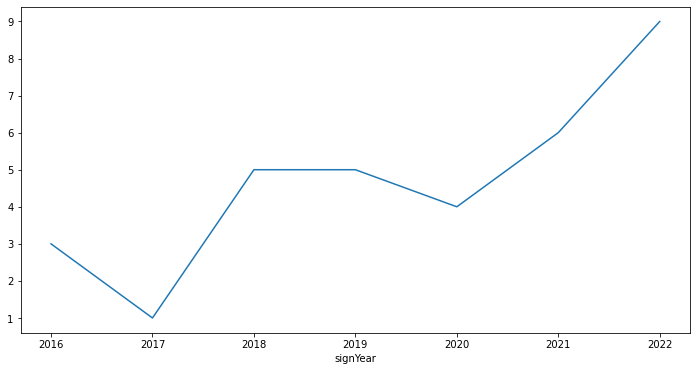

In [ ]:
po_df.groupby('signYear')['regNum'].count().plot()
# po_df.groupby('signYear')['contractPrice'].sum().plot()

На графике видно, что в период с 2019 по 2020 год произошло снижение количества контрактов, что может свидетельствовать о том, что МИД не закупал новое ПО для сотрудников во время локдауна. 

# Что ещё мы нашли

## Защита для дипломатов (2.0)

В 2013 году, по данным [СМИ](https://ru-bezh.ru/news/gossektor/4867-mid-zakupaet-protivogazy-i-kostyumy-himzaschity-dlya-sotrudnikov) МИД закупал противогазы для защиты представителей РФ в Сирии; тогда же Лавров [выступал](https://www.mid.ru/ru/foreign_policy/news/1620421/) на тему применения химического оружия. 

Мы нашли этот контракт в наборе данных. По нему МИД закупил 199 + 1 противогаз.

In [ ]:
df.iloc[1080]

regNum                                                   173100002213000096
currentContractStage                                                     EC
signDate                                                2013-07-03 00:00:00
startDate                                                               NaT
endDate                                                 2013-10-01 00:00:00
regionCode                                                               77
fz                                                                       94
currencyCode                                                            RUB
contractPrice                                                    4000000.00
sup_name                [ЗАКРЫТОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО "ХИМКОМПЛЕКТЗАЩИТА"]
sup_inn                                                          7720741767
sup_type                                                                  U
OKPD2                                                                  None
OKPD        

In [ ]:
urls_df.iloc[1080]

regNum                                                                                         173100002213000096
contractUrl     http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=0173100002213000095
printFormUrl                                   http://zakupki.gov.ru/pgz/printForm?type=CONTRACT_INFO&id=10729532
Name: 1080, dtype: object

## Страхование за рубежом, или Контракты в американских долларах

Во время анализа мы обнаружили три контракта, заключённых в долларах, притом что остальные контракты заключены в рублях. Повнимательнее посмотрим на эти данные. 

In [ ]:
usd_contrancts = df[df['currencyCode'] == 'USD']
usd_contrancts

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
1467,173100002211000032,E,2011-04-07,NaT,2013-12-01,77,94,USD,43609658.19,"[ОАО ""АЛЬФАСТРАХОВАНИЕ""]",7713056834,U,None,None,43609658.19,1.00,43609658.19,2011,NaN,2013
1468,173100002211000032,E,2011-04-07,NaT,2013-12-01,77,94,USD,22454611.02,"[ОСАО ""ИНГОССТРАХ""]",7705042179,U,None,None,22454611.02,1.00,22454611.02,2011,NaN,2013
1469,173100002211000032,E,2011-04-07,NaT,2013-12-01,77,94,USD,10679902.62,"[ОАО ""АЛЬФАСТРАХОВАНИЕ""]",7713056834,U,None,None,10679902.62,1.00,10679902.62,2011,NaN,2013


Все три контракта были заключены 7 апреля 2011 года, начали действовать 1 декабря 2013 года и действуют до сих пор -- у них не определён срок окончания действия. Все три контракта лишены кодировки по ОКПД или ОКПД2 и осуществлялись по 94-ФЗ (действовал до 2014 года, затем был отменён в связи с введением 44-ФЗ). Все закупки включены в один контракт под номером 173100002211000032.

In [ ]:
usd_contrancts.prodSum.sum()

76744171.83

Общая стоимость заключённых контрактов — **76 744 171.83 рублей** (почти семьдесят семь миллионов). 

In [ ]:
print('Ссылки на контракты на сайте госзакупок')
display(urls_df.iloc[usd_contrancts.index]['contractUrl'])

print('Ссылки на печатные версии контрактов')
display(urls_df.iloc[usd_contrancts.index]['printFormUrl'])

Ссылки на контракты на сайте госзакупок


1467    http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=0173100002211000028
1468    http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=0173100002211000029
1469    http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=0173100002211000030
Name: contractUrl, dtype: object

Ссылки на печатные версии контрактов


1467    http://zakupki.gov.ru/pgz/printForm?type=CONTRACT_INFO&id=855926
1468    http://zakupki.gov.ru/pgz/printForm?type=CONTRACT_INFO&id=870664
1469    http://zakupki.gov.ru/pgz/printForm?type=CONTRACT_INFO&id=872052
Name: printFormUrl, dtype: object

Согласно информации из контрактов, речь идёт о страховании трёх лотов, которые находятся за пределами РФ и принадлежат МИДу. Визуализируем долю трёх продуктов в общей стоимости контракта. 

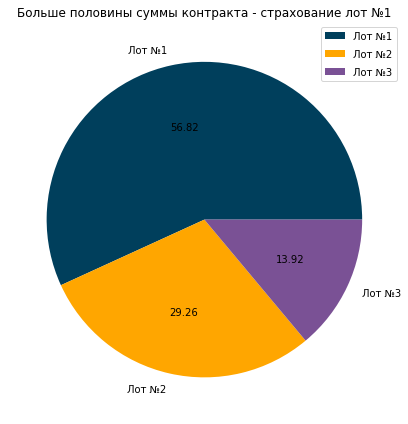

In [ ]:
fig, ax = plt.subplots()
labels = {1467: 'Лот №1', 1468: 'Лот №2', 1469: 'Лот №3'}
ax.pie(usd_contrancts.prodSum, 
       labels=[labels[l] for l in usd_contrancts.index],
       autopct='%.2f', colors=pie_colors)
ax.legend()
ax.set_title('Больше половины суммы контракта - страхование лот №1')
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Больше половины суммы контракта - страхование лот №1')

Сохранено: graphs/Больше половины суммы контракта - страхование лот №1.png


Посмотрим на другие контракты МИДа с этими поставщиками -- по ИНН поставщиков. 

In [ ]:
df[df.sup_inn.apply(lambda x: x in list(set(usd_contrancts.sup_inn)))].sort_values(by=['sup_inn', 'signDate'], ascending=[True, False])

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
659,1770420620116000000,EC,2016-12-20,2017-01-01,2017-12-31,77,44,RUB,686500.00,"[СТРАХОВОЕ ПУБЛИЧНОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО ""ИНГОССТРАХ""]",7705042179,U,65.12.71.000,None,686500.00,1.00,686500.00,2016,2017.00,2017
1468,173100002211000032,E,2011-04-07,NaT,2013-12-01,77,94,USD,22454611.02,"[ОСАО ""ИНГОССТРАХ""]",7705042179,U,None,None,22454611.02,1.00,22454611.02,2011,NaN,2013
1467,173100002211000032,E,2011-04-07,NaT,2013-12-01,77,94,USD,43609658.19,"[ОАО ""АЛЬФАСТРАХОВАНИЕ""]",7713056834,U,None,None,43609658.19,1.00,43609658.19,2011,NaN,2013
1469,173100002211000032,E,2011-04-07,NaT,2013-12-01,77,94,USD,10679902.62,"[ОАО ""АЛЬФАСТРАХОВАНИЕ""]",7713056834,U,None,None,10679902.62,1.00,10679902.62,2011,NaN,2013


In [ ]:
explain_okpd(['65.12.71.000']);

ОКПД2 - 65.12.71.000 Услуги по страхованию поездок и неотложной помощи


- С "Ингосстрахом" МИД заключал ещё один контракт — в 2016-2017 годах, в рублях, на сумму 686 500 рублей — и в тот момент закупал "Услуги по страхованию поездок и неотложной помощи". 
- С "Альфастрахованием" у МИДа других контрактов в наборе данных нет. 

## Общежитие, или Самая дорогая закупка в наборе за всё время 

Самые дорогие по всем показателям закупки связаны со строительством общежития для МГИМО — вуза, входящего в структуры МИД (всего в структурах министерства несколько образовательных учреждений — [вот их список](https://www.mid.ru/ru/about/educational/)). 

Соберём все строки датафрейма, которые связаны со строительством общежития. 

In [ ]:
dormitory_df = df[(df['OKPD2'] == '41.20.10.120') | (df['OKPD2'] == '41.20.30.000')]
dormitory_df

,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
210,1770420620120000256,E,2020-12-25,2020-12-25,2022-12-31,77,44,RUB,1382949540.22,"[ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ""ГЛАВНОЕ СТРОИТЕЛЬНОЕ УПРАВЛЕНИЕ ФЕДЕРАЛЬНОЙ СЛУЖБЫ ИСПОЛНЕНИЯ НАКАЗАНИЙ""]",708006803,U,41.20.30.000,None,1382949540.22,1.00,1382949540.22,2020,2020.00,2022
296,1770420620120000000,EC,2020-09-22,2020-09-22,2020-12-30,77,44,RUB,47670528.88,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТРИУМФ""]",7707725276,U,41.20.10.120,None,47670528.88,1.00,47670528.88,2020,2020.00,2020
310,1770420620120000000,EC,2020-08-21,2020-08-21,2020-11-30,77,44,RUB,26424603.51,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТРИУМФ""]",7707725276,U,41.20.10.120,None,26424603.51,1.00,26424603.51,2020,2020.00,2020
614,1770420620116999936,ET,2017-06-12,2017-06-12,2020-12-30,77,44,RUB,2552243055.58,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ СТРОИТЕЛЬНАЯ КОМПАНИЯ ""СТРОЙ ГРУПП""]",7727611728,U,41.20.10.120,None,2552243055.58,1.00,2552243055.58,2017,2017.00,2020
697,1770420620116000000,ET,2016-07-01,2016-07-01,2021-01-31,77,44,RUB,2347203833.70,"[ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРАНТЕК""]",7721670893,U,41.20.10.120,None,2347203833.70,1.00,2347203833.70,2016,2016.00,2021


In [ ]:
explain_okpd(dormitory_df.OKPD2);

ОКПД2 - 41.20.30.000 Работы по возведению жилых зданий
ОКПД2 - 41.20.10.120 Здания общежитий
ОКПД2 - 41.20.10.120 Здания общежитий
ОКПД2 - 41.20.10.120 Здания общежитий
ОКПД2 - 41.20.10.120 Здания общежитий


In [ ]:
urls_df.iloc[dormitory_df.index].contractUrl

210    http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=1770420620120000148
296    http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=1770420620120000063
310    http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=1770420620120000048
614    http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=1770420620117000041
697    http://zakupki.gov.ru/epz/contract/contractCard/common-info.html?reestrNumber=1770420620116000063
Name: contractUrl, dtype: object

По контрактам проверено, что они действительно связаны со строительством общежития МГИМО.

Посчитаем общую стоимость контрактов, которые связаны со строительством общежития для МГИМО.

In [ ]:
dormitory_df['prodSum'].sum()

6356491561.889999

Сумма всех контрактов — 6 356 491 561 (более шести миллиардов рублей). 

Визуализируем доли разных поставщиков в контрактах. 

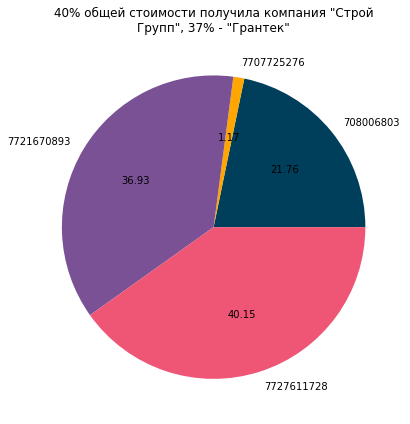

In [ ]:
graph_data = dormitory_df.groupby('sup_inn')['prodSum'].sum()

fig, ax = plt.subplots()
ax.pie(graph_data, labels=graph_data.index, 
       colors=pie_colors, autopct='%.2f')
ax.set_title(textwrap.fill('40% общей стоимости получила компания "Строй Групп", 37% - "Грантек"', width=50))
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, '40% общей стоимости получила компания "Строй Групп", 37% - "Грантек"')

Сохранено: graphs/40% общей стоимости получила компания "Строй Групп", 37% - "Грантек".png


Визуализируем долю трат на общежитие МГИМО во всех тратах МИДа за всё время.

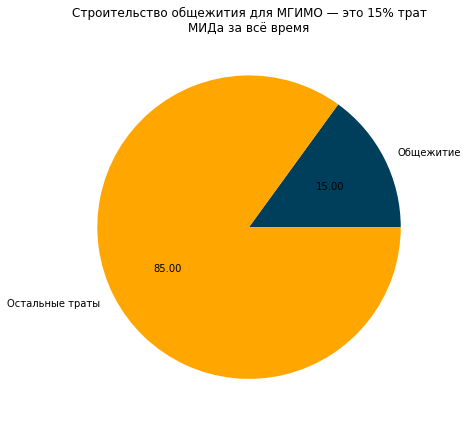

In [ ]:
np.array([dormitory_df['prodSum'].sum(), df.prodSum.sum() - dormitory_df['prodSum'].sum()])

fig, ax = plt.subplots()
ax.pie(np.array([dormitory_df['prodSum'].sum(), df.prodSum.sum() - dormitory_df['prodSum'].sum()]),
       labels=['Общежитие', 'Остальные траты'], colors=pie_colors, 
       autopct='%.2f')
ax.set_title(textwrap.fill('Строительство общежития для МГИМО — это 15% трат МИДа за всё время', 
                           width=50))
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Строительство общежития для МГИМО — это 15% трат МИДа за всё время')

Сохранено: graphs/Строительство общежития для МГИМО — это 15% трат МИДа за всё время.png


## Индивидуальные предприниматели

TODO: понять, что мы вообще с ними делаем

In [ ]:
ips = df[df['sup_type'] == 'P']
print('Количество индивидуальных предпринимателей среди исполнителей:', ips.shape[0])

Количество индивидуальных предпринимателей среди исполнителей: 60


Ни с одним ИП МИД не сотрудничал больше четырёх раз. Вот топ ИП, с которыми МИД сотрудничал. 

In [ ]:
ips['sup_inn'].value_counts()[:5]

770900801649    4
732302802323    4
332806026277    3
564900015320    3
771872171659    3
Name: sup_inn, dtype: int64

In [ ]:
top_ips_inns = list(ips.groupby('sup_inn')['regNum'].nunique().sort_values(ascending=False)[:8].index)

Посчитаем суммы, которые были потрачены на контракты с самыми частыми ИП, с которыми МИД сотрудничал (из предыдущей ячейки). 

In [ ]:
ips_stats = ips[ips['sup_inn'].apply(lambda x: x in top_ips_inns)].groupby('sup_inn', as_index=False).agg({
    'regNum': 'nunique', 
    'contractPrice': ['sum'],
    'prodSum': ['sum']  
}).sort_values(by=[('regNum', 'nunique')], ascending=False)
ips_stats

,sup_inn,regNum,contractPrice,prodSum
,,nunique,sum,sum
4,770900801649,4,10139943.33,10139943.33
3,732302802323,3,12451662.23,795329.10
5,771872171659,3,9117955.00,109075.00
0,212405747727,2,5565189.40,5565188.38
1,502602437902,2,791123.50,168741.00
2,564900015320,2,5861000.00,721500.00
6,772065158113,2,393000.00,191170.00
7,780526099497,2,2466998.72,107304.65


Посмотрим информацию по каждому ИП: 
* ИНН
* количество контрактов 
* Итоговая цена контрактов (заявленная)
* Итоговая сумма, которая была реально выплачена по контрактам
* Поставляемые услуги

In [ ]:
for inn in top_ips_inns:
    print('ИНН:', inn)
    ip_subset = df[df['sup_inn'] == inn] 
    contracts_num = ip_subset.regNum.nunique()
    total_contractPrice = ip_subset['contractPrice'].sum()
    total_prodSum = ip_subset['prodSum'].sum()
    print('Количество контрактов: ', contracts_num)
    print('Итоговая цена контрактов (заявленная):', total_contractPrice)
    print('Итоговая сумма, реально потраченная на контрактах:', total_prodSum)
    print('')
    print('Поставляемые услуги:')
    for okpd_code in ip_subset['OKPD2'].dropna().unique():
        try: print(okpd_code, get_okpd(okpd_code, 2))
        except:
            try: print(okpd_code, get_okpd(okpd_code, 1))
            except: print(okpd_code)
    print('')
    display(ip_subset)
    print('')

ИНН: 770900801649
Количество контрактов:  4
Итоговая цена контрактов (заявленная): 10139943.33
Итоговая сумма, реально потраченная на контрактах: 10139943.33

Поставляемые услуги:
58.14.19.000 Журналы печатные прочие и периодические издания



,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
78,1770420620122000128,EC,2022-05-04,2022-05-04,2022-12-31,77,44,RUB,3000000.00,[ИП ПАХМУТОВ ОЛЕГ АНАТОЛЬЕВИЧ],770900801649,P,58.14.19.000,None,750000.00,4.00,3000000.00,2022,2022.00,2022
193,1770420620120999936,E,2021-04-22,2021-04-22,2021-12-31,77,44,RUB,2995000.00,[ИП ПАХМУТОВ ОЛЕГ АНАТОЛЬЕВИЧ],770900801649,P,58.14.19.000,None,2995000.00,1.00,2995000.00,2021,2021.00,2021
277,1770420620120000000,EC,2020-10-19,2020-10-19,2021-01-29,77,44,RUB,1901610.00,[ИП ПАХМУТОВ ОЛЕГ АНАТОЛЬЕВИЧ],770900801649,P,58.14.19.000,None,1901610.00,1.00,1901610.00,2020,2020.00,2021
507,1770420620118000128,EC,2018-07-18,2018-07-18,2018-12-31,77,44,RUB,2243333.33,[ИП ПАХМУТОВ ОЛЕГ АНАТОЛЬЕВИЧ],770900801649,P,58.14.19.000,None,2243333.33,1.00,2243333.33,2018,2018.00,2018



ИНН: 732302802323
Количество контрактов:  3
Итоговая цена контрактов (заявленная): 12451662.23
Итоговая сумма, реально потраченная на контрактах: 795329.1

Поставляемые услуги:
26.20.40.120 Элементы замены типовые устройств ввода и вывода
26.20.40.190 Комплектующие и запасные части для вычислительных машин прочие, не включенные в другие группировки
26.20.21.110 Устройства запоминающие внутренние



,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
173,1770420620120999936,E,2021-07-19,2021-07-19,2021-12-31,77,44,RUB,4499752.03,[ИП СЕМЁНОВ ИГОРЬ ВЛАДИМИРОВИЧ],732302802323,P,26.20.40.120,None,6097.87,120.00,731744.40,2021,2021.00,2021
416,1770420620119000064,EC,2019-09-02,2019-09-02,2019-12-31,77,44,RUB,3991856.00,[ИП СЕМЁНОВ ИГОРЬ ВЛАДИМИРОВИЧ],732302802323,P,26.20.40.190,None,990.00,25.00,24750.00,2019,2019.00,2019
500,1770420620118000128,EC,2018-08-08,2018-08-08,2018-12-31,77,44,RUB,3633063.50,[ИП СЕМЁНОВ ИГОРЬ ВЛАДИМИРОВИЧ],732302802323,P,26.20.40.190,None,2422.00,2.00,4844.00,2018,2018.00,2018
502,1770420620118000128,EC,2018-07-25,2018-07-25,2018-12-31,77,44,RUB,326990.70,[ИП СЕМЁНОВ ИГОРЬ ВЛАДИМИРОВИЧ],732302802323,P,26.20.21.110,None,3399.07,10.00,33990.70,2018,2018.00,2018



ИНН: 771872171659
Количество контрактов:  3
Итоговая цена контрактов (заявленная): 9117955.0
Итоговая сумма, реально потраченная на контрактах: 109075.0

Поставляемые услуги:
31.01.12.110 Столы письменные деревянные для офисов, административных помещений
31.01.11.150 Мебель для сидения, преимущественно с металлическим каркасом



,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
534,1770420620118000128,EC,2018-05-14,2018-05-14,2018-12-31,77,44,RUB,4000000.00,[ИП ВЛАДЫКИН СЕРГЕЙ АНАТОЛЬЕВИЧ],771872171659,P,31.01.12.110,None,3845.00,10.00,38450.00,2018,2018.00,2018
578,1770420620117000192,EC,2017-11-01,2017-11-01,2017-12-31,77,44,RUB,1925330.00,[ИП ВЛАДЫКИН СЕРГЕЙ АНАТОЛЬЕВИЧ],771872171659,P,31.01.12.110,None,2500.00,20.00,50000.00,2017,2017.00,2017
634,1770420620116999936,EC,2017-04-14,2017-04-14,2017-12-31,77,44,RUB,3192625.00,[ИП ВЛАДЫКИН СЕРГЕЙ АНАТОЛЬЕВИЧ],771872171659,P,31.01.11.150,None,825.00,25.00,20625.00,2017,2017.00,2017



ИНН: 780526099497
Количество контрактов:  2
Итоговая цена контрактов (заявленная): 2466998.7199999997
Итоговая сумма, реально потраченная на контрактах: 107304.65

Поставляемые услуги:
46.49.22.000 Услуги по оптовой торговле журналами и газетами
58.14.19.000 Журналы печатные прочие и периодические издания



,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
374,1770420620119000064,ET,2019-12-16,2020-01-01,2020-12-31,77,44,RUB,978846.00,[ИП ФИЛАТОВ АЛЕКСЕЙ АЛЕКСЕЕВИЧ],780526099497,P,46.49.22.000,None,16500.00,1.00,16500.00,2019,2020.00,2020
561,1770420620117000192,ET,2017-12-26,2018-01-01,2018-12-31,77,44,RUB,1488152.72,[ИП ФИЛАТОВ АЛЕКСЕЙ АЛЕКСЕЕВИЧ],780526099497,P,58.14.19.000,None,18160.93,5.00,90804.65,2017,2018.00,2018



ИНН: 212405747727
Количество контрактов:  2
Итоговая цена контрактов (заявленная): 5565189.4
Итоговая сумма, реально потраченная на контрактах: 5565188.38

Поставляемые услуги:
53.20.19.120 Услуги курьерские прочие, не включенные в другие группировки



,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
205,1770420620120999936,EC,2021-03-30,2021-03-30,2021-12-31,77,44,RUB,2695769.40,[ИП КУДРЯШОВ КОНСТАНТИН ЛЕОНИДОВИЧ],212405747727,P,53.20.19.120,None,24731.82,109.00,2695768.38,2021,2021.00,2021
350,1770420620120000000,EC,2020-03-10,2020-03-10,2020-12-31,77,44,RUB,2869420.00,[ИП КУДРЯШОВ КОНСТАНТИН ЛЕОНИДОВИЧ],212405747727,P,53.20.19.120,None,16978.82,169.00,2869420.00,2020,2020.00,2020



ИНН: 564900015320
Количество контрактов:  2
Итоговая цена контрактов (заявленная): 5861000.0
Итоговая сумма, реально потраченная на контрактах: 721500.0

Поставляемые услуги:
31.01.11.150 Мебель для сидения, преимущественно с металлическим каркасом
31.01.12.110 Столы письменные деревянные для офисов, административных помещений



,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
666,1770420620116000000,EC,2016-10-19,2016-10-19,2016-12-31,77,44,RUB,741000.00,[ИП ШУЛЫНДИН АНДРЕЙ НИКОЛАЕВИЧ],564900015320,P,31.01.11.150,None,5600.00,50.00,280000.00,2016,2016.00,2016
714,1770420620116000000,EC,2016-05-13,2016-05-13,2016-12-31,77,44,RUB,3506000.00,[ИП ШУЛЫНДИН АНДРЕЙ НИКОЛАЕВИЧ],564900015320,P,31.01.12.110,None,2300.00,25.00,57500.00,2016,2016.00,2016
803,1770420620115000064,EC,2015-10-22,2015-10-22,2016-01-29,77,44,RUB,1614000.00,[ИП ШУЛЫНДИН АНДРЕЙ НИКОЛАЕВИЧ],564900015320,P,None,36.11.11.312,6400.00,60.00,384000.00,2015,2015.00,2016



ИНН: 772065158113
Количество контрактов:  2
Итоговая цена контрактов (заявленная): 393000.0
Итоговая сумма, реально потраченная на контрактах: 191170.0

Поставляемые услуги:
25.99.29.190 Изделия прочие из недрагоценных металлов, не включенные в другие группировки
25.99.99.100 Услуги по производству прочих металлических изделий, не включенных в другие группировки, отдельные, выполняемые субподрядчиком



,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
224,1770420620120000256,EC,2020-12-15,2020-12-15,2021-01-29,77,44,RUB,336000.00,[ИП МУРАВЬЕВ СЕРГЕЙ МИХАЙЛОВИЧ],772065158113,P,25.99.29.190,None,84.56,2000.00,169120.00,2020,2020.00,2021
266,1770420620120000000,EC,2020-10-26,2020-10-26,2020-12-31,77,44,RUB,57000.00,[ИП МУРАВЬЕВ СЕРГЕЙ МИХАЙЛОВИЧ],772065158113,P,25.99.99.100,None,63.00,350.00,22050.00,2020,2020.00,2020



ИНН: 502602437902
Количество контрактов:  2
Итоговая цена контрактов (заявленная): 791123.5
Итоговая сумма, реально потраченная на контрактах: 168741.0

Поставляемые услуги:
13.92.29.190 Изделия текстильные готовые прочие, не включенные в другие группировки



,regNum,currentContractStage,signDate,startDate,endDate,regionCode,fz,currencyCode,contractPrice,sup_name,sup_inn,sup_type,OKPD2,OKPD,prodPrice,prodQuantity,prodSum,signYear,startYear,endYear
440,1770420620119000064,EC,2019-05-29,2019-05-29,2019-12-31,77,44,RUB,448521.00,[ИП ЛЕЖНЕВ АНТОН НИКОЛАЕВИЧ],502602437902,P,13.92.29.190,None,267.47,300.00,80241.00,2019,2019.00,2019
516,1770420620118000128,EC,2018-07-04,2018-07-04,2018-12-31,77,44,RUB,342602.50,[ИП ЛЕЖНЕВ АНТОН НИКОЛАЕВИЧ],502602437902,P,13.92.29.190,None,354.00,250.00,88500.00,2018,2018.00,2018


In [ ]:
graph_data = ips_stats
graph_data.index = range(graph_data.shape[0])
graph_data

,sup_inn,regNum,contractPrice,prodSum
,,nunique,sum,sum
0,770900801649,4,10139943.33,10139943.33
1,732302802323,3,12451662.23,795329.10
2,771872171659,3,9117955.00,109075.00
3,212405747727,2,5565189.40,5565188.38
4,502602437902,2,791123.50,168741.00
5,564900015320,2,5861000.00,721500.00
6,772065158113,2,393000.00,191170.00
7,780526099497,2,2466998.72,107304.65


In [ ]:
graph_data.columns

MultiIndex([(      'sup_inn',        ''),
            (       'regNum', 'nunique'),
            ('contractPrice',     'sum'),
            (      'prodSum',     'sum')],
           )

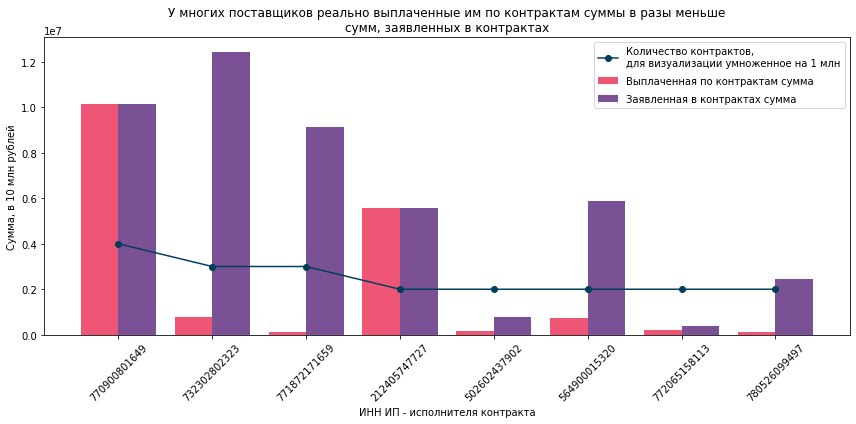

In [ ]:
fig, ax = plt.subplots()
ax.bar(x=graph_data.index - 0.2, height=graph_data[('prodSum', 'sum')], 
       width=0.4, label='Выплаченная по контрактам сумма',
       color=accent_color, zorder=2)
ax.bar(x=graph_data.index + 0.2, height=graph_data[('contractPrice', 'sum')], 
       width=0.4, label='Заявленная в контрактах сумма',
       color=second_accent_color, zorder=2)
ax.plot(graph_data.index, graph_data[('regNum', 'nunique')] * 1000000, 
        label='Количество контрактов,\nдля визуализации умноженное на 1 млн', color=default_color, zorder=5, 
        marker='o')
ax.set_xticks(ticks=range(graph_data.shape[0]), 
              labels=graph_data[('sup_inn', '')],
              rotation=45)
ax.set_ylabel('Сумма, в 10 млн рублей')
ax.set_xlabel('ИНН ИП - исполнителя контракта')
ax.legend(loc='upper right')
ax.set_title(textwrap.fill('У многих поставщиков реально выплаченные им по контрактам суммы в разы меньше сумм, заявленных в контрактах', width=80))
fig.tight_layout()
fig;

In [ ]:
save_graph(fig, 'Топ ИП')

Сохранено: graphs/Топ ИП.png
